In [1]:
# 改良版 2020/6/10

In [8]:
# 学習部




# kerasのデータセットが必要なのでインポート
from keras.datasets import mnist
# numpyを使用するのでインポート
import numpy as np
# グラフや図を使用するのでmatplotlibをインポート
import matplotlib.pyplot as plt

# kerasから文字データを取得
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# kerasから受け取ったデータをnumpy配列化
# images:縦28×横28ピクセルの大きさの1000個の文字データが入った28×28×1000の三次配列
images = np.array(x_train[0:1000])
# labels:imagesのインデックスと対応した実際に書かれた数字が入ったサイズが1000の一次配列
labels = np.array(y_train[0:1000])
# images配列の28×28の部分がそのままだと処理しにくいので784(784=28×28)×1000の二次配列に変更する
images=np.reshape(images,(-1,784))
# 入力値(images)の数とニューラルネットワークの大きさに対応する784*10のそれぞれ初期値の0.00001が入った重みの二次配列を作る
# ※二次元目が大きすぎるとones関数はエラーを吐くことがあるので一次元目と二次元目が逆の配列を作り転置する
wei=np.ones((10,784)).T*.00001
# 実際の数値を配列にしていくためのすべて０が入った10×1000の配列を作っておく
ans=np.zeros((1000,10))
# 実際の数字のインデックスの部分だけが１で他が０になるような誤差を求めるための配列を作成
# ex)5なら[0,0,0,0,0,1,0,0,0,0]
for j in range(1000):
    ans[j][labels[j]]=1
# 学習した回数の累計と学習を繰り返す数の初期化と指定
ln=0
step=100
# 学習速度の調整
alp=0.0000001
# 合計学習回数を格納
done=labels.size*step

# 正誤と誤りの大きさを入れるための配列
acu=np.zeros(done)
err_lis=np.empty(done)
# 誤った数字を入れるための配列
err_num=np.zeros((10,10))
for l in range(step):
    #今何文字目なのかの数を入れる数の指定     
    i=0
    for item in images:
#       予測値を導出
        pred=np.dot(item,wei)
#     　純誤差(偏差)の導出
        err=pred-ans[i]
#     　エラーと入力値による直積でデルタを導出
        DaM=np.outer(item,err)
#       一番大きい(1に近い)値をpredから取り出す
        nea=pred.argmax()
#     　実際の値に対しての誤差の大きさを出し、格納
        ers=round((1-pred[labels[i]])**2,7)
        err_lis[ln]=ers
#        正誤判定
        if labels[i]==nea:
            ok="〇"
            acu[ln]=1
        else:
            ok="×"
            err_num[labels[i]][nea]=err_num[labels[i]][nea]+1
#        出力
        print(ln+1,"回目　",ok,"実際の数字:",labels[i],"予測した数字",nea,"誤差指数",ers)
#       各回数をインクリメント
        i+=1
        ln+=1
#        学習結果の反映
        wei-=(DaM*alp)

1 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5252626
2 回目　 × 実際の数字: 0 予測した数字 5 誤差指数 0.6166615
3 回目　 × 実際の数字: 4 予測した数字 0 誤差指数 0.7364127
4 回目　 × 実際の数字: 1 予測した数字 0 誤差指数 0.8304281
5 回目　 × 実際の数字: 9 予測した数字 0 誤差指数 0.8136127
6 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.8313838
7 回目　 × 実際の数字: 1 予測した数字 2 誤差指数 0.8185164
8 回目　 × 実際の数字: 3 予測した数字 2 誤差指数 0.9695731
9 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.6027387
10 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.7810758
11 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3419189
12 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 1.0490547
13 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0824943
14 回目　 × 実際の数字: 6 予測した数字 3 誤差指数 0.9860054
15 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.576642
16 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 1.0109995
17 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.8713361
18 回目　 × 実際の数字: 8 予測した数字 7 誤差指数 1.0918409
19 回目　 × 実際の数字: 6 予測した数字 8 誤差指数 0.767693
20 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.9721675
21 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4795188
22 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4360801
23 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.6753079
24 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.5784781
25 

237 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.3486719
238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1783637
239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1852481
240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0834951
241 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.6688835
242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2580928
243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0715673
244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0450002
245 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.9917384
246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0810784
247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3815217
248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3941011
249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2341745
250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0059336
251 回目　 × 実際の数字: 3 予測した数字 7 誤差指数 0.8004758
252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0316211
253 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.2009636
254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2090354
255 回目　 × 実際の数字: 3 予測した数字 0 誤差指数 0.8500696
256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0452616
257 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 1.1213934
258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1501884
259 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.6579219
260 回目　 〇 実

454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0346297
455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0782779
456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000206
457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1987974
458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1918884
459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0055595
460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.7125697
461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4156756
462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0829564
463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008432
464 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.6592104
465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0125561
466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0562667
467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0992166
468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0465809
469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3965404
470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2876213
471 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.583965
472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3551771
473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.6413082
474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1773532
475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3168407
476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2070423
477 回目　 〇 実際の

686 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3218552
687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1985485
688 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.3461728
689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2808137
690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2513372
691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.8675458
692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1371671
693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2006079
694 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.5650388
695 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.8432004
696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2896218
697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3290396
698 回目　 × 実際の数字: 4 予測した数字 8 誤差指数 0.4970988
699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1061595
700 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.749639
701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2188087
702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0556375
703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2479872
704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0377575
705 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.5830034
706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1403021
707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1830879
708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.113449
709 回目　 〇 実際の

1113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0135781
1114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038831
1115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0544948
1116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1572966
1117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.381448
1118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0488954
1119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2759859
1120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0433163
1121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0088608
1122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.019823
1123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2620465
1124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0051987
1125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0991763
1126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1942877
1127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0539929
1128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0665892
1129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0304507
1130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0624902
1131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1346595
1132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0665805
1133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 1.2672525
1134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4458824
1135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 

1320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1623023
1321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.076622
1322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0840732
1323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6192812
1324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0944616
1325 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.3059205
1326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0275393
1327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0613225
1328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0030087
1329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.4971882
1330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.07693
1331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1225694
1332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0477632
1333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1393064
1334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0718512
1335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1911203
1336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0700293
1337 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.4137593
1338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016042
1339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.182805
1340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0208387
1341 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.8607665
1342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.

1534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 1.1132884
1535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1293593
1536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1781882
1537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2275848
1538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0396608
1539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098219
1540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2038039
1541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.5992747
1542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2407787
1543 回目　 × 実際の数字: 0 予測した数字 8 誤差指数 0.1893772
1544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4913592
1545 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3201777
1546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1573973
1547 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.803491
1548 回目　 × 実際の数字: 6 予測した数字 9 誤差指数 0.3674561
1549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1008553
1550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1967245
1551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1314155
1552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3207038
1553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2258128
1554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0
1555 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.8065797
1556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.025

1761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4770304
1762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0040052
1763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1366801
1764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3048018
1765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3520238
1766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.083326
1767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0050404
1768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2257764
1769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3438987
1770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1605768
1771 回目　 × 実際の数字: 6 予測した数字 8 誤差指数 0.64426
1772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1687632
1773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2857792
1774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0671302
1775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0094821
1776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2519787
1777 回目　 × 実際の数字: 0 予測した数字 5 誤差指数 0.4494595
1778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0215662
1779 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.8869009
1780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0675035
1781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.032772
1782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0073571
1783 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.

2012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3013451
2013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0359804
2014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0081757
2015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0081323
2016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0332653
2017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4595297
2018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0818996
2019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1636876
2020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8715975
2021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0654678
2022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.8e-06
2023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4064116
2024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0640133
2025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 1.3407208
2026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1953304
2027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4592642
2028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0198843
2029 回目　 × 実際の数字: 2 予測した数字 0 誤差指数 0.2811559
2030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6996401
2031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.27437
2032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1765487
2033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0600695
2034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.

2234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.140808
2235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1502491
2236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0784362
2237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.182904
2238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0555345
2239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1747995
2240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0194113
2241 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.5843416
2242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1113047
2243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0383172
2244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0182894
2245 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.5819784
2246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0063409
2247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2504855
2248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2239226
2249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1043801
2250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004415
2251 回目　 × 実際の数字: 3 予測した数字 7 誤差指数 0.5875346
2252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0369988
2253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0967514
2254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0688039
2255 回目　 × 実際の数字: 3 予測した数字 0 誤差指数 0.5642468
2256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 

2456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003784
2457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1203796
2458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2707278
2459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0030988
2460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.5798612
2461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2634346
2462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0042487
2463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0054056
2464 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5566928
2465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.007796
2466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0063196
2467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1244567
2468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003369
2469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2410161
2470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2172547
2471 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.5881502
2472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2490297
2473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.5667725
2474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1087833
2475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0697028
2476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1292851
2477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1429059
2478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数

2884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0118747
2885 回目　 × 実際の数字: 7 予測した数字 2 誤差指数 0.8042436
2886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0653975
2887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0207124
2888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2230959
2889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.17035
2890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3499915
2891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2612393
2892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0382942
2893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.4131209
2894 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.3382055
2895 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.316718
2896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000378
2897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2165435
2898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246771
2899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0105798
2900 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.9725996
2901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3687682
2902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0369403
2903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.922825
2904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3039209
2905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0054209
2906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1

3084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0667895
3085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3551126
3086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.013282
3087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2721185
3088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.174271
3089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0692108
3090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062564
3091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0289163
3092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0793587
3093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2944989
3094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1136928
3095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0533738
3096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000407
3097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0947359
3098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0028024
3099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.02744
3100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2488012
3101 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.8733512
3102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0774663
3103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0076014
3104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0279375
3105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0534492
3106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0

3291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0261642
3292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1168433
3293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2532135
3294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004253
3295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.040488
3296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0289311
3297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0723147
3298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0185035
3299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0468028
3300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1194242
3301 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5041097
3302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0116139
3303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011586
3304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0092396
3305 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.443666
3306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.04044
3307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0407706
3308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0583697
3309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0026479
3310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.050647
3311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0152962
3312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.184994
3313 回目　 × 実際の数字: 8 予測した数字 6 誤差指数 0.14

3490 回目　 × 実際の数字: 0 予測した数字 5 誤差指数 0.1474012
3491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000467
3492 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.8135308
3493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0304037
3494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0193444
3495 回目　 × 実際の数字: 6 予測した数字 0 誤差指数 0.3577399
3496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1e-07
3497 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.5167204
3498 回目　 × 実際の数字: 7 予測した数字 2 誤差指数 0.5229808
3499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0621858
3500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0092995
3501 回目　 × 実際の数字: 3 予測した数字 7 誤差指数 0.5726515
3502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3167749
3503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5074311
3504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2193175
3505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0202924
3506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0192894
3507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1655839
3508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0769866
3509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0241339
3510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2923669
3511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0173106
3512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2

3728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0832981
3729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3320072
3730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1795285
3731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0850004
3732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2177437
3733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0079066
3734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0170821
3735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0028401
3736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045147
3737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0899815
3738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0302791
3739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2002665
3740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0191121
3741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0787624
3742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3539249
3743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1001286
3744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.012992
3745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6701574
3746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067166
3747 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.3399506
3748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0900453
3749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2329906
3750 回目　 × 実際の数字: 4 予測した数字 9 誤差指数

3947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5530892
3948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3293411
3949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1657343
3950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1636635
3951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061674
3952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1137535
3953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1043053
3954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0434876
3955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0666693
3956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0787321
3957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2395546
3958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0796445
3959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1448309
3960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0363066
3961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0456899
3962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009756
3963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0194429
3964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0547089
3965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2432014
3966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0071401
3967 回目　 × 実際の数字: 3 予測した数字 6 誤差指数 0.7616273
3968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1033292
3969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数

4171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0254445
4172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0113204
4173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1793973
4174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3322914
4175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1382449
4176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0018636
4177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0116325
4178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0784659
4179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2174463
4180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1275707
4181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.9190098
4182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0902852
4183 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4191377
4184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0097926
4185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005138
4186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0396882
4187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.4330738
4188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0069555
4189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2375356
4190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0099894
4191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0984717
4192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.070789
4193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数

4360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0216816
4361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1210455
4362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0563353
4363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2044274
4364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0698207
4365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3548189
4366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1003485
4367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0913725
4368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0028987
4369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1295772
4370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0195561
4371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6917327
4372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0073904
4373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1287318
4374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0044703
4375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0622651
4376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000124
4377 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.4912509
4378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0146484
4379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0172969
4380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0937023
4381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0643777
4382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数

4590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.6625137
4591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0797753
4592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 5.5e-05
4593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2014839
4594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0081948
4595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 1.0123866
4596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.074749
4597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1970771
4598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2146817
4599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0051664
4600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1394989
4601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3202511
4602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2533406
4603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3660442
4604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1403495
4605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2527366
4606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2010853
4607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0919275
4608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2981916
4609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.447791
4610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018973
4611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2988988
4612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.

4781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0294367
4782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095265
4783 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5561008
4784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0324997
4785 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.783712
4786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.005273
4787 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3173344
4788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0020242
4789 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.6692971
4790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1999214
4791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1909983
4792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012765
4793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.408123
4794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0141969
4795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0138887
4796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0464179
4797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1659675
4798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061817
4799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0408132
4800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1088979
4801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0477047
4802 回目　 × 実際の数字: 2 予測した数字 4 誤差指数 0.6760177
4803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0

4986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0441325
4987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0599533
4988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0539534
4989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2226747
4990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1115701
4991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1009622
4992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.406112
4993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3992466
4994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1296468
4995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0441344
4996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2584852
4997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0491112
4998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0093388
4999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3530115
5000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0672127
5001 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3598565
5002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0537733
5003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0406374
5004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0552303
5005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.075215
5006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0957293
5007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013337
5008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 

5401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018936
5402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1185414
5403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0132061
5404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0852092
5405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4195064
5406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0202926
5407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0050115
5408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0223778
5409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0044598
5410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1971959
5411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0042871
5412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243567
5413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4478534
5414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0121789
5415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2996353
5416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2419847
5417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.147753
5418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.204994
5419 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.7399306
5420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0137426
5421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4826006
5422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0205613
5423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 

5622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0332925
5623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0105856
5624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1500138
5625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2087281
5626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2497338
5627 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.8683575
5628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2370382
5629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3095736
5630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0148141
5631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2433686
5632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3110757
5633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0009162
5634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1039746
5635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2130828
5636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.5176988
5637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1602617
5638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1325779
5639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322504
5640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0315831
5641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0593407
5642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.169762
5643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0088858
5644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数

5828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0552018
5829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2716708
5830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0242368
5831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1676177
5832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0766402
5833 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4945192
5834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001988
5835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0831379
5836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229997
5837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3949703
5838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0195208
5839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0354859
5840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0142034
5841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2663684
5842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041211
5843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1395548
5844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3047492
5845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3253998
5846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0875632
5847 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.7845545
5848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004775
5849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1203552
5850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指

6048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1010484
6049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.570787
6050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292843
6051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1731838
6052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.04243
6053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 7.15e-05
6054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3400124
6055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2810159
6056 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.374194
6057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0384705
6058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.122438
6059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0297112
6060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0395345
6061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0089914
6062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4433209
6063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1250335
6064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0113174
6065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2172225
6066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0823228
6067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.016963
6068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.07273
6069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.057711
6070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.045802

6243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0293327
6244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.014424
6245 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3799674
6246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011906
6247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1798679
6248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1444949
6249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1160004
6250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.85e-05
6251 回目　 × 実際の数字: 3 予測した数字 7 誤差指数 0.4165567
6252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0378727
6253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0862874
6254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0766133
6255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4247611
6256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0286394
6257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.451492
6258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0107248
6259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4122392
6260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1424028
6261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.072709
6262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0481115
6263 回目　 × 実際の数字: 2 予測した数字 0 誤差指数 0.4439287
6264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0337652
6265 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.

6477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0440663
6478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0843594
6479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0161011
6480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0224416
6481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2576831
6482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0302161
6483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.361346
6484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004774
6485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0626269
6486 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.5098931
6487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1389808
6488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1146206
6489 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.5451736
6490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1123673
6491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020337
6492 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.6605327
6493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.043378
6494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0028385
6495 回目　 × 実際の数字: 6 予測した数字 0 誤差指数 0.2929825
6496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0026926
6497 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.5003775
6498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.476291
6499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0

6676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0053153
6677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0313033
6678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1030677
6679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.063347
6680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.488744
6681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1790748
6682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001549
6683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3066731
6684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0027849
6685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0422908
6686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.168734
6687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.110556
6688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2168124
6689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2118623
6690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.088211
6691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6685895
6692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.073887
6693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1612903
6694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2861847
6695 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.329723
6696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1287842
6697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2837396
6698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.338

7122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0135289
7123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1479141
7124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0021753
7125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.071592
7126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0839627
7127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0050536
7128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0420698
7129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0356222
7130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003274
7131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1309967
7132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0544279
7133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 1.0668961
7134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4194073
7135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.8592448
7136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1438632
7137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1667184
7138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5450792
7139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.286604
7140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0653977
7141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4368132
7142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0801575
7143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3090976
7144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 

7344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3380339
7345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0294353
7346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0324804
7347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5948769
7348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0110393
7349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2597085
7350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0022678
7351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0582195
7352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.095867
7353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5976341
7354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0959541
7355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3018125
7356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.04415
7357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1920709
7358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002064
7359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0461917
7360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0239805
7361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0868886
7362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.058602
7363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1732435
7364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0731868
7365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3402437
7366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.

7574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005728
7575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.4871366
7576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0691742
7577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.259648
7578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0055819
7579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2048032
7580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2126868
7581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.003752
7582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0179812
7583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1196474
7584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2866599
7585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2431392
7586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1638105
7587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2642416
7588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1679829
7589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.5042025
7590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.6153854
7591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0539695
7592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.001751
7593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1700323
7594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068207
7595 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.8901542
7596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0

7955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.047234
7956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0634359
7957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1781948
7958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0528829
7959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1214148
7960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0242832
7961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.03307
7962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0088211
7963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0190799
7964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0452862
7965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1780241
7966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0063559
7967 回目　 × 実際の数字: 3 予測した数字 6 誤差指数 0.60629
7968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0843218
7969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1963837
7970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055158
7971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1787067
7972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1392256
7973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0247611
7974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0035922
7975 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5551113
7976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.008243
7977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.01

8177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.007474
8178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0661428
8179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1592215
8180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0949409
8181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.8884102
8182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0898287
8183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3181183
8184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0100864
8185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002407
8186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0280723
8187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.4090015
8188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.019762
8189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2079696
8190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0034511
8191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1184918
8192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0477834
8193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1939803
8194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0310828
8195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1062131
8196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2929944
8197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.133098
8198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1001312
8199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0

8401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.00927
8402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.109782
8403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0086316
8404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1138699
8405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3895939
8406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0196108
8407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038867
8408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0189663
8409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0046612
8410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1714541
8411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0072113
8412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0171414
8413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4182117
8414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0073272
8415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2943761
8416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2078646
8417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1361737
8418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1456769
8419 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.6945421
8420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0048116
8421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4749839
8422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0213626
8423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0

8616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1413471
8617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0495018
8618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0012934
8619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0286963
8620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1912915
8621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0938508
8622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0211954
8623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0126821
8624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1447154
8625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2080384
8626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2031763
8627 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.7199846
8628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1619458
8629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2899553
8630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0051561
8631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1992533
8632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2799416
8633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0123736
8634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.097719
8635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2110591
8636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.4664977
8637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1314277
8638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数

8853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2735432
8854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0132254
8855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.8175796
8856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0010236
8857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0980842
8858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1380618
8859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7823905
8860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0561673
8861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016002
8862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0068208
8863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0453823
8864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1846926
8865 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4609339
8866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.022288
8867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2653651
8868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0463719
8869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4279137
8870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1783313
8871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3214734
8872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007474
8873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.01244
8874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0104486
8875 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.

9057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0265743
9058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1341242
9059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0175365
9060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0348391
9061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.005435
9062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4486053
9063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1488265
9064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0079438
9065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2161901
9066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0743777
9067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0226903
9068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0766108
9069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0447828
9070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0367185
9071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038842
9072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1676044
9073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.024289
9074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0034638
9075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1008461
9076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0322361
9077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4351394
9078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0157435
9079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 

9260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1159695
9261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0484002
9262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0404096
9263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3915605
9264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0349574
9265 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5492397
9266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0821084
9267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0320485
9268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0642598
9269 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.4422878
9270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0622832
9271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1561693
9272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1703739
9273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0972296
9274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0523956
9275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2238709
9276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019556
9277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0405392
9278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0054299
9279 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.4292136
9280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2935929
9281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0810687
9282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指

9468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0036672
9469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0830168
9470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1585684
9471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4617915
9472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1914481
9473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3805283
9474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0450888
9475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0268321
9476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1200779
9477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0205623
9478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0921663
9479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0125958
9480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0268099
9481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2280459
9482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0254011
9483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3490302
9484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0012787
9485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0636663
9486 回目　 × 実際の数字: 8 予測した数字 9 誤差指数 0.5385739
9487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1323245
9488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0841982
9489 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.4864158
9490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指

9724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0417938
9725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0242542
9726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0516473
9727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2073133
9728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0308589
9729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2464028
9730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1175871
9731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0471829
9732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2069501
9733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002602
9734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0084706
9735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0007219
9736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0076657
9737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0382081
9738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0227584
9739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.134745
9740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0374546
9741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0766829
9742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2918222
9743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0390404
9744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0122853
9745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.5934078
9746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数

9955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0397313
9956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0596461
9957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.164437
9958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0471984
9959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.112496
9960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0216897
9961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0304822
9962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0086711
9963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0199479
9964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0450151
9965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1600641
9966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0060862
9967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.5663237
9968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0784264
9969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1922375
9970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061197
9971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.16061
9972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1311096
9973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0194822
9974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0018917
9975 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5297357
9976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0056406
9977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.

10263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3770193
10264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0350366
10265 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5399721
10266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0835254
10267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0297058
10268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0612013
10269 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.4353488
10270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0642596
10271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1559039
10272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1769016
10273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0988046
10274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.050222
10275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2140232
10276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015695
10277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0409072
10278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0040463
10279 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.4169913
10280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2784425
10281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0796657
10282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 5e-07
10283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.394813
10284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0259939
10285 回目　 〇 実際の数

10455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709494
10456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 8.5e-06
10457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0656962
10458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1948386
10459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138678
10460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.4321062
10461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.141419
10462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 4.74e-05
10463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016764
10464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4241917
10465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049223
10466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001149
10467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1656807
10468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042359
10469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0749231
10470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1547421
10471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4494912
10472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1861357
10473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3672662
10474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0421678
10475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0257564
10476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1190319
10477 回目　 〇 実際

10790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1637627
10791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1601146
10792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001952
10793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3535661
10794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0271434
10795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0066783
10796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0248988
10797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1214717
10798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027825
10799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0582025
10800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0875478
10801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0358566
10802 回目　 × 実際の数字: 2 予測した数字 4 誤差指数 0.5694101
10803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0677307
10804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0504419
10805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0528091
10806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.129755
10807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0448327
10808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0253356
10809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4041735
10810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.037445
10811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0240747
10812 回目　 〇 

10987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0573384
10988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0483072
10989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1722847
10990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0590352
10991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.138261
10992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3309143
10993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2959744
10994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1386027
10995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0555918
10996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.1564645
10997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.018494
10998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0088713
10999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3493986
11000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0446794
11001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2966898
11002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0534699
11003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0305645
11004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0393307
11005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0483017
11006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0514374
11007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001437
11008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1086292
11009 回目　 〇 

11232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0677659
11233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4269713
11234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1544621
11235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.164781
11236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0417474
11237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1593013
11238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0060454
11239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1639167
11240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0061513
11241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.5032395
11242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0468547
11243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0232515
11244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0114553
11245 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3227969
11246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002752
11247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1580373
11248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0980476
11249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.122753
11250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.7e-06
11251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.328814
11252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0343733
11253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0734405
11254 回目　 〇 実際の

11454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0427749
11455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0722639
11456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 2.32e-05
11457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0636619
11458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1874561
11459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0146026
11460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.4206381
11461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1340216
11462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 1.42e-05
11463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014758
11464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4167618
11465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.004516
11466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.53e-05
11467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1679519
11468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0047952
11469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.06805
11470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1510446
11471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4382718
11472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1813379
11473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3559855
11474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0397176
11475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0249768
11476 回目　 〇 実際の数

11680 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4093066
11681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1875853
11682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0024578
11683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2458706
11684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0077025
11685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0312981
11686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1454107
11687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0917672
11688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1631715
11689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1770915
11690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0702332
11691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6519333
11692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0632026
11693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1534733
11694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2531924
11695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2631709
11696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0886125
11697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2743225
11698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2942414
11699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0560623
11700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3561027
11701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2209686
11702 回目　 

11885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6900751
11886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0187647
11887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0112054
11888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0779549
11889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0925705
11890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4104151
11891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2201336
11892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007176
11893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2480897
11894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2571418
11895 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.2901957
11896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015311
11897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2908393
11898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0254398
11899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003644
11900 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.6654684
11901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2798984
11902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0320437
11903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.7152565
11904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1605144
11905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0509382
11906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1492754
11907 回目　 〇

12121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0043124
12122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0144289
12123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1127012
12124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001162
12125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0707146
12126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0540255
12127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0150454
12128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.041865
12129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0295961
12130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012283
12131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1309466
12132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0441589
12133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.9814513
12134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3822513
12135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.7139897
12136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1510526
12137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1453821
12138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4852306
12139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2105409
12140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0769214
12141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4430016
12142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0642479
12143 回目　 〇 

12343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1662899
12344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3184183
12345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0317303
12346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0220084
12347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.6372986
12348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0075729
12349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2223255
12350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.002111
12351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0644436
12352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0821447
12353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5375011
12354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0908414
12355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2762504
12356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0336525
12357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1402179
12358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009959
12359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0422542
12360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0256436
12361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0569167
12362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.059373
12363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1459402
12364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0777068
12365 回目　 〇 

12556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0701714
12557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0740586
12558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0248042
12559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2381886
12560 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.2623197
12561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3625018
12562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1615426
12563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0050983
12564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0143661
12565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1343269
12566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0240234
12567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0101958
12568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.042677
12569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1319841
12570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1283496
12571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222915
12572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0040818
12573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0244655
12574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005371
12575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.457476
12576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0588978
12577 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.2432112
12578 回目　 〇 

12772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0716743
12773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0579966
12774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0380235
12775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0023364
12776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.124928
12777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4156453
12778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0231315
12779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4074724
12780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0419123
12781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0196525
12782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0195424
12783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5315902
12784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0179848
12785 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.5467229
12786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0014773
12787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2816682
12788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.9e-06
12789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5329156
12790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1556105
12791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1530712
12792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001204
12793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3375396
12794 回目　 〇 実

13009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0335071
13010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0073596
13011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0337597
13012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0638375
13013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.060576
13014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2e-07
13015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029311
13016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0487598
13017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.346626
13018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0871057
13019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0723387
13020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.7392405
13021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0442968
13022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0031899
13023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3510084
13024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0524916
13025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.8014517
13026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1707213
13027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3222373
13028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0021564
13029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1927582
13030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5325691
13031 回目　 〇 実際の数

13231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3600861
13232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0642062
13233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3998966
13234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1574526
13235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1678131
13236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0399384
13237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1517218
13238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0040268
13239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1611543
13240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0069561
13241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4910569
13242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0375029
13243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0221749
13244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0105577
13245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3123432
13246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001427
13247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1522044
13248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0863439
13249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.122899
13250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5e-07
13251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3044148
13252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0333594
13253 回目　 〇 実際の

13587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2063842
13588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1761495
13589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4807052
13590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5395154
13591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0428551
13592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0113467
13593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.127294
13594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0064861
13595 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7430869
13596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0639968
13597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.174943
13598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1884864
13599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0057333
13600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1211796
13601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3157325
13602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2754792
13603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3692835
13604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0808371
13605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1934129
13606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1386091
13607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0542077
13608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2124518
13609 回目　 〇 

13831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1060367
13832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1464783
13833 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.3863305
13834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023074
13835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0676648
13836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0253344
13837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3026528
13838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0190031
13839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0099254
13840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0135798
13841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.200402
13842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045715
13843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0869395
13844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2485854
13845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2564917
13846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0742037
13847 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.5002034
13848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0043224
13849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.061045
13850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0263013
13851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.6010207
13852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0133287
13853 回目　 〇 

14031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.219285
14032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1421166
14033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0027596
14034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.913783
14035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1837364
14036 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.5229365
14037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.136447
14038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0341666
14039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0815984
14040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1538501
14041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0121038
14042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1855103
14043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1057379
14044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1520976
14045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.26556
14046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0742915
14047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3903213
14048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0507501
14049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4786031
14050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0272078
14051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1935678
14052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.016477
14053 回目　 〇 実際の数

14261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0261391
14262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0317337
14263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.330067
14264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0344773
14265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5126139
14266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0871992
14267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0250711
14268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0505393
14269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4109551
14270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709426
14271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1554531
14272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1982487
14273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1034329
14274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0430013
14275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1837031
14276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006127
14277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0427328
14278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012124
14279 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.3732979
14280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2303123
14281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0750845
14282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004266
14283 回目　 〇

14448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0609483
14449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1073273
14450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0270723
14451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.23e-05
14452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1537706
14453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1749527
14454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.048421
14455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0751524
14456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 9.2e-05
14457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0591676
14458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1695398
14459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.016557
14460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.3905677
14461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1163604
14462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 2.39e-05
14463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010611
14464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3983925
14465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0035809
14466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 7e-06
14467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1729833
14468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0064333
14469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0525699
14470 回目　 〇 実際の数字: 8

14676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0001023
14677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0142828
14678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0773645
14679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0582412
14680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3813978
14681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1893837
14682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0032983
14683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2253963
14684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0098252
14685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0257743
14686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1379049
14687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0855384
14688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1452651
14689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1590432
14690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0644441
14691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6501822
14692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0592482
14693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1484726
14694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2445345
14695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2377638
14696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0718295
14697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2738349
14698 回目　 

14899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0014663
14900 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.6245697
14901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2703204
14902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0325788
14903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.6628515
14904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1443774
14905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0575336
14906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1517988
14907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0998021
14908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1354398
14909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0677502
14910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0165875
14911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2331133
14912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0010919
14913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1197914
14914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1764514
14915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0007488
14916 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.4841879
14917 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.2686857
14918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0591517
14919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1345671
14920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0214089
14921 回目　 

15120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0303056
15121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0058497
15122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0143018
15123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0973483
15124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006666
15125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0697348
15126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.043939
15127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0195175
15128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0421379
15129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.027372
15130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0027274
15131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.130479
15132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0394651
15133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.944823
15134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3637833
15135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.6528244
15136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1516861
15137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1378884
15138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4579425
15139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1861709
15140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.081244
15141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4442105
15142 回目　 〇 実際の

15350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0020055
15351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.066245
15352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0769344
15353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5098082
15354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0886201
15355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2663339
15356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.02997
15357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1192543
15358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0016274
15359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0414243
15360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0259312
15361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0454878
15362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0596128
15363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.134638
15364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0778502
15365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3300604
15366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1022315
15367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1288262
15368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0023732
15369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0928219
15370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0237718
15371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6882323
15372 回目　 〇 実際

15576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0550032
15577 回目　 × 実際の数字: 4 予測した数字 3 誤差指数 0.236277
15578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.002084
15579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1366457
15580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1750157
15581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0025525
15582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0048599
15583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0747239
15584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2165498
15585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1369458
15586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1298691
15587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1934987
15588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1774379
15589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4771463
15590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5211785
15591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0425785
15592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0146622
15593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1175991
15594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065456
15595 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7125821
15596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0603447
15597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1693899
15598 回目　 〇 

15788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8e-06
15789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5057728
15790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1452226
15791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1438474
15792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 7.23e-05
15793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3150666
15794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.035883
15795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0053908
15796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0156915
15797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1074645
15798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029979
15799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0670637
15800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.077958
15801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0279107
15802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.5143023
15803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0688126
15804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0533162
15805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0407495
15806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1316648
15807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0401306
15808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0235931
15809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3932473
15810 回目　 〇 実際の数字

16015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0031582
16016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0517995
16017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3341417
16018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0912227
16019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0681547
16020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.7173209
16021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0395027
16022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0041369
16023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3434825
16024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0528928
16025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.7400759
16026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1627523
16027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3095702
16028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.001011
16029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1836776
16030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5148118
16031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.205541
16032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1356974
16033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0017284
16034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9194164
16035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1764238
16036 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.5265619
16037 回目　 〇 

16245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3007096
16246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.57e-05
16247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1447513
16248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0728559
16249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1220065
16250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.08e-05
16251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2746164
16252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0321242
16253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0630547
16254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0673618
16255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3367101
16256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0112419
16257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3141886
16258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0030744
16259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3936806
16260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0744628
16261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0206331
16262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0289353
16263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3118414
16264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0338781
16265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5033875
16266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0881609
16267 回目　 〇 

16503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4645725
16504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1854525
16505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218342
16506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0484005
16507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0772184
16508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0667871
16509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068305
16510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.095963
16511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0080807
16512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1339237
16513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1247994
16514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 3.5e-06
16515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.143765
16516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0291285
16517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0222667
16518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2305048
16519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3633367
16520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0648522
16521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038254
16522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001282
16523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0690029
16524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2138853
16525 回目　 〇 実際

16731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0312273
16732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1923997
16733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0032571
16734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00503
16735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.001966
16736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0092613
16737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0234094
16738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0145737
16739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1020975
16740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0515826
16741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0687974
16742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2600384
16743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0250358
16744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0105813
16745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.5463499
16746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001385
16747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2975661
16748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0582856
16749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0854364
16750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3930478
16751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2961672
16752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0124456
16753 回目　 × 実際

16919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1366069
16920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206378
16921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3582719
16922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0086729
16923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2414917
16924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0030313
16925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0486578
16926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0018493
16927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002994
16928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0289619
16929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0010057
16930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2578408
16931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1805649
16932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1149577
16933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1973472
16934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.083823
16935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0054163
16936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1393339
16937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3188756
16938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008541
16939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2252866
16940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2282692
16941 回目　 〇

17110 回目　 × 実際の数字: 2 予測した数字 3 誤差指数 0.575499
17111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3428019
17112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002235
17113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0040824
17114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001531
17115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1039701
17116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1281274
17117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1927404
17118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.00329
17119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2242681
17120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0300338
17121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0069438
17122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0140977
17123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0886154
17124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004239
17125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0689685
17126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0389086
17127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0220543
17128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0423442
17129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0262576
17130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036659
17131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1302099
17132 回目　 〇 実

17342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.008432
17343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1454052
17344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3030351
17345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0330586
17346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0167198
17347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.6554904
17348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0061398
17349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.20186
17350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0019431
17351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.066858
17352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0741167
17353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4939292
17354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0872405
17355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2611707
17356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.028023
17357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1078601
17358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020829
17359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0411234
17360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0260129
17361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0395245
17362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0598179
17363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1281692
17364 回目　 〇 実際の

17578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017415
17579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1261967
17580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1692086
17581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0025988
17582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0037993
17583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0683715
17584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2044054
17585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1218572
17586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1239931
17587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1823603
17588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1782758
17589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4748499
17590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5055813
17591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0429082
17592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0177675
17593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1095014
17594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0066296
17595 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.687619
17596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0569432
17597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1639494
17598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.190869
17599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0117471
17600 回目　 〇 

17801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0249605
17802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4962999
17803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0698684
17804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0536316
17805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0370035
17806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1324529
17807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0392242
17808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0235264
17809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3912929
17810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0365264
17811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.017936
17812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1181091
17813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0098012
17814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0392997
17815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0057179
17816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0277849
17817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015378
17818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1331444
17819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0462076
17820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.050316
17821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1405856
17822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.153808
17823 回目　 〇 実

18004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0297415
18005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0322857
18006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0268536
18007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0017282
18008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1151797
18009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0317235
18010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0064458
18011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0328184
18012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0508215
18013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0534793
18014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.94e-05
18015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033384
18016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0534603
18017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3272834
18018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0934655
18019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0665058
18020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.7055998
18021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0369301
18022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0047755
18023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3388218
18024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0533588
18025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.7074289
18026 回目　 〇

18234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1610651
18235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1748618
18236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.036606
18237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1344997
18238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015787
18239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1529985
18240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0093598
18241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.466908
18242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0217051
18243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0212563
18244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0090417
18245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2943484
18246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.93e-05
18247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1404326
18248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0657702
18249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1210608
18250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.87e-05
18251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2582674
18252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0314122
18253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0596891
18254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0640085
18255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3316366
18256 回目　 〇 実際

18457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.055187
18458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1526159
18459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0187475
18460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.3587524
18461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0997933
18462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002304
18463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007241
18464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3793961
18465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0027942
18466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001195
18467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1768421
18468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0085144
18469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0393361
18470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1289309
18471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.381705
18472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1583045
18473 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.3096146
18474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0291676
18475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0230753
18476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1119168
18477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018837
18478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0997555
18479 回目　 〇 

18675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0762969
18676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002192
18677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098878
18678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0725761
18679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0562426
18680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3553274
18681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1899816
18682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0037862
18683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2073753
18684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0118778
18685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0198257
18686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1309091
18687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0803539
18688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1295227
18689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1390289
18690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0586965
18691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.650507
18692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0550857
18693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.142161
18694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2382409
18695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2120765
18696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0551097
18697 回目　 〇 

18869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3690335
18870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1581584
18871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2392533
18872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0134929
18873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0073816
18874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0131007
18875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1633815
18876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.012667
18877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1214713
18878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1296322
18879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0762237
18880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.1904949
18881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0220266
18882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0056262
18883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0686876
18884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0433617
18885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.64748
18886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0172268
18887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0141046
18888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0453942
18889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0731136
18890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.4089785
18891 回目　 〇 実

19122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138516
19123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0808616
19124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002462
19125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0681572
19126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0348091
19127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.024329
19128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0425532
19129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0253497
19130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045044
19131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1299652
19132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0342494
19133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.9064214
19134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3432602
19135 回目　 × 実際の数字: 1 予測した数字 5 誤差指数 0.5869494
19136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1504356
19137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1312275
19138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.4289688
19139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1657623
19140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0856832
19141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4433201
19142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0552607
19143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2485221
19144 回目　 〇

19342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0080829
19343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1392314
19344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.298097
19345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0332669
19346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0153
19347 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.6583935
19348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0057279
19349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1965854
19350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001889
19351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0671139
19352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0716727
19353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4797509
19354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0859216
19355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2569272
19356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0263446
19357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0980282
19358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0025519
19359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0409331
19360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0260612
19361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0345863
19362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0600623
19363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1223245
19364 回目　 〇 実際の

19551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1395427
19552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1522105
19553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1366007
19554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000726
19555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3764486
19556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0811383
19557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0753178
19558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0159811
19559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1918207
19560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2368923
19561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3175568
19562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.145127
19563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0054875
19564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0078947
19565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1338384
19566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254073
19567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0033505
19568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0362556
19569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0998482
19570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1304373
19571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0269693
19572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0066239
19573 回目　 〇 

19785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.45669
19786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0071673
19787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2637936
19788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.27e-05
19789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.477067
19790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1337956
19791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.133328
19792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.04e-05
19793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2887062
19794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0409956
19795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0049521
19796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0113564
19797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1019278
19798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0034481
19799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0702335
19800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0719832
19801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0222041
19802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4799585
19803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0710523
19804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0536373
19805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0336971
19806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1330945
19807 回目　 〇 実際の数

20008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1142754
20009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0309373
20010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0063285
20011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0323949
20012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0474419
20013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0507852
20014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.03e-05
20015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0035314
20016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0548556
20017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3213057
20018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0953385
20019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0654791
20020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6956557
20021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0347209
20022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.005413
20023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3343695
20024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.053933
20025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.679518
20026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.15287
20027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2951428
20028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002242
20029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1762802
20030 回目　 × 実際の数

20232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0557051
20233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3386268
20234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1612344
20235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.177604
20236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0354491
20237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1286155
20238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011184
20239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1496451
20240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0103613
20241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4593243
20242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0175401
20243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0213218
20244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0086868
20245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2886292
20246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 7.9e-06
20247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1365352
20248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0597856
20249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.120013
20250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.51e-05
20251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.244147
20252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0307471
20253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0566954
20254 回目　 〇 実際の数

20429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0525986
20430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049348
20431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0246413
20432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0143914
20433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1130967
20434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020306
20435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1806843
20436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008092
20437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1898116
20438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1585369
20439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236809
20440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1013403
20441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0030265
20442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1293444
20443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0695191
20444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0405039
20445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3715726
20446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0062232
20447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0818153
20448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0494482
20449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0913141
20450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0282573
20451 回目　 

20674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0228292
20675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0702657
20676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0006702
20677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0082711
20678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0708256
20679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0553796
20680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.345333
20681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1898745
20682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0038604
20683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.200841
20684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0126671
20685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0173789
20686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1281123
20687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0786746
20688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1237025
20689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1306
20690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0562607
20691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6512313
20692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0533388
20693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.139238
20694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.236261
20695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2016616
20696 回目　 〇 実際の数字

20896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 4.6e-05
20897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2902535
20898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0161055
20899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042253
20900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5758719
20901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2566883
20902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0342152
20903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5782661
20904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1216821
20905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0657235
20906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1535523
20907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0737562
20908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1341051
20909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.06931
20910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0244019
20911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2101383
20912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001251
20913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1086055
20914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1682534
20915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024169
20916 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.4452747
20917 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.2484098
20918 回目　 〇 実際の

21105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065194
21106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0215531
21107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0469345
21108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1641093
21109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0162449
21110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.5019771
21111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3411144
21112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0014892
21113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037154
21114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004875
21115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0960917
21116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1255782
21117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1760291
21118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0032583
21119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2107867
21120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0301014
21121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0091907
21122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0135891
21123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0739556
21124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001243
21125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0673253
21126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0314118
21127 回目　 

21314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0327239
21315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3552416
21316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 7.12e-05
21317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3576196
21318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021078
21319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0358501
21320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0580459
21321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0020452
21322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0612467
21323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6132963
21324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0136712
21325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1346902
21326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0434195
21327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0471317
21328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0239153
21329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3764636
21330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0174661
21331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0275201
21332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0512301
21333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.109645
21334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0004043
21335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0326137
21336 回目　 〇 

21558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0145477
21559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1827297
21560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2303835
21561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3086311
21562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1422192
21563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055517
21564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0067423
21565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1340598
21566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258522
21567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0024018
21568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0351414
21569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0942971
21570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1309833
21571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0275822
21572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0071569
21573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0291815
21574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000702
21575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.4168603
21576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0503675
21577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.22151
21578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0012923
21579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1098829
21580 回目　 〇 実

21760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0597694
21761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1850544
21762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1101291
21763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0609514
21764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2302188
21765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2629366
21766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0550477
21767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0072513
21768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1220215
21769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2968518
21770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.08022
21771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2511926
21772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0376783
21773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0341523
21774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0449935
21775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022343
21776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1036237
21777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3898875
21778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0252843
21779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3039107
21780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0372723
21781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0137835
21782 回目　 〇 

21984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3286287
21985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0070184
21986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0050876
21987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0420468
21988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.036757
21989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1383392
21990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0229809
21991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1626436
21992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2704015
21993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.214227
21994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1377579
21995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0653619
21996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.0890282
21997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0048529
21998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0081219
21999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3381979
22000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0307891
22001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.238197
22002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.04624
22003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0284951
22004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0261779
22005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0264336
22006 回目　 〇 実際の

22193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1220597
22194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0324334
22195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0907226
22196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2505284
22197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1190577
22198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0645689
22199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2928348
22200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008557
22201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0681672
22202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0994335
22203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3247606
22204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0062332
22205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1554521
22206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0709332
22207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0133843
22208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1372911
22209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002594
22210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005488
22211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0710518
22212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011794
22213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4428442
22214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.040614
22215 回目　 〇

22449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0871767
22450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0287728
22451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007091
22452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1226611
22453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1495182
22454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0598258
22455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0777359
22456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003289
22457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0522585
22458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1407284
22459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.020616
22460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.3342869
22461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0878819
22462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000587
22463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004963
22464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3637715
22465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.002318
22466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002639
22467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.178684
22468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0104181
22469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0308228
22470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1193097
22471 回目　 〇 実際

22653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2117914
22654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0266041
22655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0179438
22656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0159783
22657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0445554
22658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1061263
22659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0411367
22660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1104493
22661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2436886
22662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2659266
22663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004682
22664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006829
22665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0950961
22666 回目　 × 実際の数字: 6 予測した数字 4 誤差指数 0.392823
22667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.184782
22668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.12319
22669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0390153
22670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0774954
22671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0998777
22672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0148754
22673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0252261
22674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0237356
22675 回目　 〇 実際

22864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1420764
22865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3473809
22866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0069899
22867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1493394
22868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0298525
22869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.354894
22870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1532612
22871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2254275
22872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.014395
22873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0059771
22874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0134588
22875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1494876
22876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0154062
22877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1206874
22878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1298893
22879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0744363
22880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.1477127
22881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0257505
22882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0054977
22883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0621429
22884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0418935
22885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6305254
22886 回目　 〇 

23086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 2.16e-05
23087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0394476
23088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1036589
23089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0402758
23090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0003411
23091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0038914
23092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0405867
23093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2025444
23094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1896698
23095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0093845
23096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.88e-05
23097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0304303
23098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0007743
23099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0248915
23100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1466843
23101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.6614516
23102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0757077
23103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109409
23104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0255246
23105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005555
23106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0219853
23107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0469321
23108 回目　 〇 実

23309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0318444
23310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.023889
23311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022917
23312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1490726
23313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1401261
23314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0328957
23315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3550237
23316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 2.44e-05
23317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.344643
23318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016963
23319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.033368
23320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0572486
23321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011858
23322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0600975
23323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6121355
23324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0116843
23325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1290229
23326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0425751
23327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0463473
23328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0252101
23329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.3672316
23330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.015714
23331 回目　 〇 実際の

23518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1987994
23519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3296239
23520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0672818
23521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034453
23522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 5.1e-06
23523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0789168
23524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1987831
23525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2546421
23526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2214915
23527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0207874
23528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.262528
23529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4919398
23530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0997495
23531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2793618
23532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0126576
23533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2638387
23534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.6309344
23535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0067282
23536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.137633
23537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1192411
23538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 2.7e-06
23539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.00018
23540 回目　 〇 実際の数字:

23734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0029146
23735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0036693
23736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0101039
23737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0176529
23738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0094185
23739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0841848
23740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0595615
23741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0616324
23742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2465599
23743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0215001
23744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095463
23745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.5173179
23746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007353
23747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2865665
23748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0584275
23749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0607196
23750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3312847
23751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2887151
23752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0074217
23753 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.2293625
23754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0219127
23755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2642466
23756 回目　 

23931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1517694
23932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1121754
23933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1689385
23934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440894
23935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0065438
23936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1240054
23937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3117648
23938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048102
23939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1985131
23940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2283738
23941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1611837
23942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1411224
23943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007211
23944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2155538
23945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0888822
23946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3499982
23947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.4350485
23948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1009269
23949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1251128
23950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.086031
23951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004432
23952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1231939
23953 回目　 〇

24150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0012497
24151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1412624
24152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0640163
24153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0349365
24154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1146673
24155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1539815
24156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0287499
24157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0112518
24158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.069772
24159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.352561
24160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0171537
24161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6742552
24162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.143422
24163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.110468
24164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0010435
24165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0116254
24166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0057574
24167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0232841
24168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3828974
24169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3644778
24170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0046423
24171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0212835
24172 回目　 〇 実際

24357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0785014
24358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037254
24359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0406928
24360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0261794
24361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0255647
24362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0607732
24363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1097958
24364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0725944
24365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3243463
24366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.092151
24367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1428132
24368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0040812
24369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0822654
24370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0278354
24371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6625426
24372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034852
24373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1047674
24374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0083398
24375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0375086
24376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000954
24377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2758461
24378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0280009
24379 回目　 〇 

24576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0490828
24577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2137519
24578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010843
24579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1005175
24580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1541698
24581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0031448
24582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0021215
24583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0535669
24584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1717354
24585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0854868
24586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1082909
24587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1527784
24588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1789766
24589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4725898
24590 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.4669492
24591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0460856
24592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0266229
24593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0896423
24594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0069765
24595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6272161
24596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0472899
24597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1465473
24598 回目　 

24765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2468112
24766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.055568
24767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.008557
24768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1181631
24769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2929123
24770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0738794
24771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2336086
24772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0310559
24773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0299797
24774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0472273
24775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018227
24776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0992168
24777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.382429
24778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0257101
24779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2830272
24780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0365497
24781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0126115
24782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0303634
24783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.546226
24784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109971
24785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4187306
24786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0111052
24787 回目　 〇 実際

24976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0001794
24977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0270757
24978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0424288
24979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1745013
24980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1156717
24981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1304703
24982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0157656
24983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0017312
24984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3234569
24985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0049935
24986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.003807
24987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0388777
24988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0339154
24989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1328026
24990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0184343
24991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1649791
24992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2593045
24993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2018442
24994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1367708
24995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0677617
24996 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.0810227
24997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0034415
24998 回目　 〇

25181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.8304711
25182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1355412
25183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2140673
25184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0094929
25185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005284
25186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0066658
25187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.371227
25188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0511617
25189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1760653
25190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005869
25191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1687867
25192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0310035
25193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1130973
25194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0325548
25195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0881009
25196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2474176
25197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1161383
25198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0589508
25199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2893099
25200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011399
25201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0666499
25202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0916124
25203 回目　 〇 

25403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0060241
25404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1831548
25405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3497088
25406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0087114
25407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004914
25408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111608
25409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0092029
25410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1142961
25411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0068711
25412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0008221
25413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3344452
25414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0013156
25415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2941493
25416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1154518
25417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1039912
25418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0503418
25419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.5610371
25420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0014985
25421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4284915
25422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0168201
25423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042288
25424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1142147
25425 回目　 

25604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0564166
25605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1575977
25606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0908848
25607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0240024
25608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1747955
25609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2873388
25610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002732
25611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1208318
25612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4532815
25613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0211875
25614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1302032
25615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2613838
25616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0683549
25617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0127122
25618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.00263
25619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.025516
25620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1730086
25621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.039224
25622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0021568
25623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0116921
25624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1209492
25625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1843946
25626 回目　 〇 実際

25839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0016771
25840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0091427
25841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.14997
25842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003449
25843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0610208
25844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2058599
25845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2139741
25846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0683339
25847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.34693
25848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0103688
25849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0340761
25850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352925
25851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.530463
25852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0264099
25853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2395093
25854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0294609
25855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.6327112
25856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003303
25857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0980268
25858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1236009
25859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7142698
25860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0482445
25861 回目　 〇 実際の数字

26052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0056223
26053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0027189
26054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2542465
26055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0963088
26056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2096895
26057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0069641
26058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1363958
26059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004284
26060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0275101
26061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018377
26062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4222237
26063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1933948
26064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0015706
26065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1990447
26066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0799774
26067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0370428
26068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0818854
26069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.032478
26070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0155734
26071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007063
26072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1625858
26073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0163522
26074 回目　 〇 

26250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000226
26251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2117091
26252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.028859
26253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.049428
26254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0510087
26255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3200897
26256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0064338
26257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2596521
26258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012214
26259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3690598
26260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0450371
26261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0066845
26262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0188126
26263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2514284
26264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0301843
26265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4818893
26266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0887392
26267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0250529
26268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.030114
26269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3552992
26270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0803742
26271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1575454
26272 回目　 〇 実際

26475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0227878
26476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1066835
26477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.73e-05
26478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0970553
26479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0027801
26480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0264593
26481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1433299
26482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0145894
26483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3440628
26484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0036985
26485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0722176
26486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.589601
26487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1094989
26488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0270331
26489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3218321
26490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0640973
26491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0066388
26492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3498413
26493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0917433
26494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0142566
26495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1712821
26496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.011447
26497 回目　 × 実

26673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025117
26674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.025373
26675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0577562
26676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0029612
26677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049514
26678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0669618
26679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.053245
26680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3226217
26681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1889835
26682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0037351
26683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1868783
26684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0143981
26685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0117178
26686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1211439
26687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0759405
26688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1105694
26689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1104093
26690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0499273
26691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6545358
26692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0490934
26693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1313708
26694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2322589
26695 回目　 〇 実

26857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0982016
26858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1232942
26859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.7122082
26860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0478079
26861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.95e-05
26862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020649
26863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0013607
26864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1350027
26865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3318235
26866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.005903
26867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1341464
26868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.028899
26869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3432724
26870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1487809
26871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.216675
26872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0147622
26873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0048353
26874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0136005
26875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1373401
26876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0175859
26877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1195805
26878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1300921
26879 回目　 〇 実際

27058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1355948
27059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002766
27060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0274692
27061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017504
27062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4206301
27063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1941419
27064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014612
27065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1980837
27066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0807686
27067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0374564
27068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0818645
27069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0323833
27070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0150266
27071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0073092
27072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1617326
27073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0160772
27074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 9.74e-05
27075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1075534
27076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0436007
27077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3267973
27078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005502
27079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0607179
27080 回目　 〇 

27450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0301163
27451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015174
27452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1070791
27453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1352835
27454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0650456
27455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0773093
27456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004742
27457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0493364
27458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1303174
27459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0226633
27460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.3113254
27461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0767432
27462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011568
27463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002936
27464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3468937
27465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0019687
27466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0004184
27467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1792975
27468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0124679
27469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0238667
27470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1098382
27471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3411527
27472 回目　 

27672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0131904
27673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0251035
27674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0257571
27675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0562299
27676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0034297
27677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0045606
27678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0664546
27679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0529456
27680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3195742
27681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1888141
27682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036848
27683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1850993
27684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0146143
27685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0109775
27686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1201162
27687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0757248
27688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1087798
27689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1076595
27690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0489798
27691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.655192
27692 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0485049
27693 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1301748
27694 回目　 〇

27889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0571327
27890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3975899
27891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2118604
27892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020541
27893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2129791
27894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1948422
27895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2192697
27896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002051
27897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2806029
27898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0110269
27899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0072225
27900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5467797
27901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2443918
27902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0360312
27903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.5048564
27904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1041424
27905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.071773
27906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1525293
27907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0556999
27908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.129348
27909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0678107
27910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0309012
27911 回目　 〇 

28091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.002566
28092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0337286
28093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1868603
28094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1826231
28095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0076548
28096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3e-05
28097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.029868
28098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0004302
28099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0229967
28100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1344926
28101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.6343933
28102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0773104
28103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0126791
28104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0249619
28105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038151
28106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0225694
28107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0474257
28108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1648861
28109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0142864
28110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4036532
28111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3374446
28112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0046561
28113 回目　 〇 実際の数

28284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0273852
28285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1073172
28286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0955589
28287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0693111
28288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0021512
28289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0661172
28290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0883928
28291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0176292
28292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0907272
28293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1441129
28294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002042
28295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0151163
28296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0366053
28297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.05304
28298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0420864
28299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.053387
28300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0204742
28301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3128652
28302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001169
28303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0083674
28304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0491803
28305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4068937
28306 回目　 〇 実際

28616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0580227
28617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0100438
28618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0031066
28619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0250828
28620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1722891
28621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0348247
28622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0013485
28623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0110619
28624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1196237
28625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1815228
28626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0786599
28627 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.3770594
28628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0332416
28629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2799952
28630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0006725
28631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1001103
28632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2024588
28633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0510848
28634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0637876
28635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2603617
28636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.3102706
28637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0577982
28638 回目　 

28950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0797137
28951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001844
28952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1246672
28953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0387751
28954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0056828
28955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0075964
28956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0447605
28957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.118329
28958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0401051
28959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0824173
28960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0134806
28961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0247354
28962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0059503
28963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0260237
28964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0543633
28965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0914746
28966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0033591
28967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4441049
28968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0566237
28969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1682522
28970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0141242
28971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0841685
28972 回目　 〇

29147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0120019
29148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0017681
29149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4057821
29150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0023433
29151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1357526
29152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0611913
29153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0295133
29154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1137117
29155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1531834
29156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0283742
29157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0093888
29158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0688302
29159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3309046
29160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0169242
29161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.647361
29162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1368395
29163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1002827
29164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0010691
29165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0134582
29166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041637
29167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0199774
29168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.396921
29169 回目　 × 

29340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003819
29341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.379626
29342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0061555
29343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1183476
29344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2799111
29345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0328251
29346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0111199
29347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6550145
29348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0041026
29349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1831286
29350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0017165
29351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0653544
29352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0629194
29353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4269369
29354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0803598
29355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2447861
29356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0202314
29357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0640417
29358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0048267
29359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0405807
29360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0263855
29361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.019746
29362 回目　 〇 

29525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2350757
29526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2203564
29527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0179399
29528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2519547
29529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4372207
29530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.095876
29531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2665654
29532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0092416
29533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2587334
29534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5974437
29535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0029626
29536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1363693
29537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0996944
29538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 6.18e-05
29539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000403
29540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.022824
29541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3201371
29542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0742278
29543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.05854
29544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4182983
29545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1337727
29546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1379367
29547 回目　 〇 実際の数

29742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2409259
29743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0206423
29744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0091289
29745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4990846
29746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004371
29747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2792652
29748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0602842
29749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0478933
29750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2988449
29751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.284295
29752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0052361
29753 回目　 × 実際の数字: 3 予測した数字 5 誤差指数 0.2038464
29754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0233894
29755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2454094
29756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1667724
29757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0020474
29758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0019331
29759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0071062
29760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0609005
29761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1756737
29762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1279874
29763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0534446
29764 回目　 〇

29949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1217307
29950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0786204
29951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001546
29952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.124892
29953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0380812
29954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060646
29955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0069147
29956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0442394
29957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1168155
29958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0403849
29959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0819911
29960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0132592
29961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0245802
29962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0058044
29963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0261049
29964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0547079
29965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0897721
29966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0032586
29967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4407659
29968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0561869
29969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1672822
29970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0145702
29971 回目　 〇

30136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1416732
30137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1229779
30138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3758584
30139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1420134
30140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0936275
30141 回目　 × 実際の数字: 7 予測した数字 3 誤差指数 0.4339417
30142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0491287
30143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.230022
30144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.256581
30145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0204525
30146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0041612
30147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0119045
30148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.001672
30149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4045124
30150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0025608
30151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1347256
30152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0606112
30153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0286237
30154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1135966
30155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1531785
30156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0282553
30157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.009118
30158 回目　 〇 実際

30560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2063618
30561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2795016
30562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1349575
30563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0056046
30564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.003237
30565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1351335
30566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0278665
30567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0003553
30568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0321814
30569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0777758
30570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1329552
30571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0278682
30572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0087043
30573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.030541
30574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009352
30575 回目　 × 実際の数字: 3 予測した数字 1 誤差指数 0.3879381
30576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0477527
30577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1984396
30578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008516
30579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0865255
30580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1453797
30581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038361
30582 回目　 〇 

30782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0346604
30783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5546185
30784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009054
30785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3878776
30786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.014994
30787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2477372
30788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000229
30789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4213954
30790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.11114
30791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1117691
30792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001519
30793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2359917
30794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.049706
30795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042327
30796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058855
30797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0964845
30798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0047571
30799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0692765
30800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.058493
30801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.011001
30802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.4108242
30803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0773699
30804 回目　 〇 実際の数字:

31001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2050868
31002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0404356
31003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0270523
31004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208542
31005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0176903
31006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.010151
31007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0048058
31008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032498
31009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.026479
31010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0069226
31011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0291438
31012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0360741
31013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0394692
31014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3.83e-05
31015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0047008
31016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0591769
31017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2990162
31018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1009236
31019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0654871
31020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6607265
31021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0263239
31022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0086832
31023 回目　 〇 実

31185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065607
31186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0050574
31187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3665087
31188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0560745
31189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1707609
31190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.001568
31191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1771091
31192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0293637
31193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0988327
31194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0325703
31195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0834462
31196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2438508
31197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1111405
31198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.049939
31199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2824214
31200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0017919
31201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0639883
31202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0795741
31203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3144415
31204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0066527
31205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1437423
31206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0704516
31207 回目　 〇 

31413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3177331
31414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001031
31415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2893196
31416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1014138
31417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0965066
31418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0404608
31419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.5375199
31420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0031859
31421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4110228
31422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0161443
31423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.002408
31424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.122901
31425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0278907
31426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0674064
31427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0340781
31428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.004922
31429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0618395
31430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.007742
31431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0166668
31432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0157364
31433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0996498
31434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016067
31435 回目　 〇 実際の

31616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0489224
31617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0079042
31618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0035909
31619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0246951
31620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1718383
31621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0311178
31622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0008019
31623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0104346
31624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1187119
31625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1790564
31626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0712394
31627 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.3582859
31628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0277338
31629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2819105
31630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0008227
31631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0942983
31632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.196326
31633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0505708
31634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0606801
31635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2667513
31636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2982501
31637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.053375
31638 回目　 〇 

31808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0244562
31809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3898384
31810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0341286
31811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0129571
31812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1258995
31813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0150522
31814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0324918
31815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022939
31816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0263579
31817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001823
31818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1288862
31819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0586674
31820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0555509
31821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1290821
31822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1340268
31823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2304568
31824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0998206
31825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0598411
31826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0230219
31827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1431843
31828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0157726
31829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0761537
31830 回目　 

32001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.201925
32002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.039862
32003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0268776
32004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0204184
32005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0169709
32006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0094849
32007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049848
32008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1021046
32009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0260885
32010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0070404
32011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0288006
32012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0353684
32013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0387098
32014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3.58e-05
32015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0048115
32016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.059383
32017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2976187
32018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.101166
32019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0657267
32020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6586226
32021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0257565
32022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0089487
32023 回目　 〇 実際の

32222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0519681
32223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0076123
32224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055612
32225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4251715
32226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1490461
32227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0606405
32228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0240819
32229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2108304
32230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0051226
32231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4038891
32232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0479602
32233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2863419
32234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1544704
32235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1930197
32236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0293848
32237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1041935
32238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002216
32239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1324661
32240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0161739
32241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4301726
32242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0050073
32243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0237477
32244 回目　 

32410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1025759
32411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.004725
32412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.37e-05
32413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3152876
32414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0010027
32415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2884442
32416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0995605
32417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0953467
32418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0391572
32419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.5342575
32420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.003483
32421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.4082627
32422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0160711
32423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0022054
32424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1241907
32425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0267349
32426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0659204
32427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0351328
32428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0048412
32429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0626075
32430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.007996
32431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0162239
32432 回目　 〇 実際

32602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2958091
32603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3725606
32604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.049417
32605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.147031
32606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0763564
32607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0152651
32608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1644604
32609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2679405
32610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0006333
32611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1030665
32612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4526612
32613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0231953
32614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1276439
32615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2748124
32616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0461508
32617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0072898
32618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0037514
32619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0245766
32620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1717304
32621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0300106
32622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0006643
32623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0102291
32624 回目　 〇 

32808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.024463
32809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3900583
32810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0339257
32811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0127261
32812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1266348
32813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0152374
32814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0323871
32815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021612
32816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0262795
32817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001502
32818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1281964
32819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0593241
32820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0559341
32821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1287841
32822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1329431
32823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2290287
32824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1000776
32825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.059266
32826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0224773
32827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1382403
32828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0153382
32829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0742357
32830 回目　 〇 

33060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0275253
33061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0013408
33062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4118126
33063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.196878
33064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009898
33065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1930129
33066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0854002
33067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.039457
33068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0816539
33069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0320829
33070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.012421
33071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0087988
33072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1562541
33073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0147862
33074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.64e-05
33075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.11052
33076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0425693
33077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3045543
33078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.004309
33079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.059452
33080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0654919
33081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.6489898
33082 回目　 〇 実際の数字:

33282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0049956
33283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1948831
33284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0280813
33285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1000259
33286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0976329
33287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0672316
33288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0013341
33289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0621542
33290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0914173
33291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0162619
33292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0867669
33293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1411503
33294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002757
33295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0116189
33296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0335454
33297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0520324
33298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0429261
33299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0513225
33300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0175161
33301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2984076
33302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0008004
33303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0089209
33304 回目　 

33504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1817597
33505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0222343
33506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0527464
33507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0444527
33508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0592916
33509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012356
33510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0584911
33511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052537
33512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0859463
33513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1711758
33514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.000161
33515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1136201
33516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0246633
33517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0284421
33518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1772226
33519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2899468
33520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0656309
33521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0033395
33522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 6.26e-05
33523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0912143
33524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1842061
33525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2245363
33526 回目　 〇 

33700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2090193
33701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.19866
33702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0188869
33703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0390672
33704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.022368
33705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1611363
33706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0008922
33707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2501905
33708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0395491
33709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3352178
33710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0761092
33711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0389685
33712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1594686
33713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0608149
33714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001832
33715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1379293
33716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.004809
33717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1196173
33718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004482
33719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2490299
33720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0179823
33721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3945135
33722 回目　 〇 実際

33948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0718947
33949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1190084
33950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0747034
33951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 7.7e-05
33952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1255953
33953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0356238
33954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0074522
33955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004669
33956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0422494
33957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1111208
33958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0416252
33959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0806032
33960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0124584
33961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0239875
33962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052459
33963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0262815
33964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0559192
33965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0838071
33966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0029084
33967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4280659
33968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0547252
33969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1635846
33970 回目　 〇 実

34170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0059631
34171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0231198
34172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0387154
34173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1107222
34174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3164284
34175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1714526
34176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0011392
34177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0099805
34178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0336025
34179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0691154
34180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0342683
34181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.8112799
34182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.153806
34183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1993352
34184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0087163
34185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0071131
34186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046108
34187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3646599
34188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0578219
34189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1683837
34190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020906
34191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1801254
34192 回目　 〇

34388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0021533
34389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1724195
34390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1040767
34391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6166263
34392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0452412
34393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0071741
34394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012078
34395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0851864
34396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0235077
34397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3756997
34398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037509
34399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0380983
34400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.096479
34401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0286158
34402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0868675
34403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062067
34404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1891866
34405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3458634
34406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058167
34407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 8.57e-05
34408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0103844
34409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.011117
34410 回目　 〇 実

34599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0256925
34600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1212085
34601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3211303
34602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2965395
34603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3738719
34604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0478742
34605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1448303
34606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.073325
34607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0134704
34608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1622829
34609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2633088
34610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007482
34611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0988724
34612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4527976
34613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0237788
34614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1266123
34615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2784095
34616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.04098
34617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061892
34618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004068
34619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0243562
34620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1715605
34621 回目　 〇 実際

34824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1005934
34825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0581724
34826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0214366
34827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1290252
34828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.014537
34829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0706661
34830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258399
34831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0572133
34832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2183511
34833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3170869
34834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0074784
34835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0474561
34836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.024222
34837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.233942
34838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0149111
34839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003992
34840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.007651
34841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1300881
34842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0025965
34843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0544955
34844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1829795
34845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1954381
34846 回目　 〇 実際

35186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0044981
35187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3640916
35188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0583156
35189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1676287
35190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022632
35191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1809959
35192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0285565
35193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0913285
35194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0325084
35195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0807717
35196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2428635
35197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1082829
35198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0451964
35199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2782853
35200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022541
35201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0625071
35202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0735308
35203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3091235
35204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0069838
35205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1393895
35206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0703617
35207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0080149
35208 回目　 

35389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722093
35390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1034229
35391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6158571
35392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.044871
35393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.006662
35394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.001143
35395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0841112
35396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0236623
35397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3748735
35398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0035676
35399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0379386
35400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0963717
35401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0286513
35402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0865225
35403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0062182
35404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1894257
35405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3454871
35406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055838
35407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 6.57e-05
35408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0103415
35409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0113066
35410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0982475
35411 回目　 〇 実際

35588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1770893
35589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4757403
35590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4360831
35591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0520084
35592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0352226
35593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0719515
35594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007418
35595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5729514
35596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0375569
35597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1252363
35598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.202226
35599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0260049
35600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1211835
35601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3212556
35602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2968365
35603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3745546
35604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0471593
35605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1438365
35606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0719557
35607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0126627
35608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1612922
35609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2611061
35610 回目　 〇 

35792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002311
35793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2192366
35794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0522732
35795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0038853
35796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048416
35797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0959007
35798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0052353
35799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0668864
35800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0533464
35801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0078551
35802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3875883
35803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0796268
35804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0495055
35805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.017353
35806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1336268
35807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0388038
35808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0243997
35809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3907901
35810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0333045
35811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0120858
35812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1288456
35813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0156949
35814 回目　 〇

36003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0261702
36004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0188921
36005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144475
36006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.007261
36007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0056162
36008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0976007
36009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0245758
36010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0075745
36011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.027412
36012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0328469
36013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0360194
36014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.56e-05
36015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052554
36016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.060023
36017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2927351
36018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.101876
36019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0668478
36020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6513211
36021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0236924
36022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0099446
36023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3040543
36024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0599318
36025 回目　 × 実際の

36211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0599028
36212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011607
36213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.3839593
36214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0417782
36215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0090367
36216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 6.57e-05
36217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0493798
36218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0569532
36219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.032474
36220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0075095
36221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0406976
36222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0534145
36223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0079622
36224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058653
36225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4042053
36226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1367106
36227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0592611
36228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0178604
36229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1965519
36230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0041673
36231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4086447
36232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0462086
36233 回目　 〇 

36448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0334623
36449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0668348
36450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.032336
36451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029307
36452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0835637
36453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1132482
36454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0723837
36455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0749234
36456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007005
36457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.04534
36458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1190115
36459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0259047
36460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.2838925
36461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0624992
36462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.002324
36463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 7.59e-05
36464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3208979
36465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016961
36466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006085
36467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1779865
36468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0151463
36469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0165885
36470 回目　 〇 実際の

36670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.054709
36671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0503548
36672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0106373
36673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0251909
36674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0289781
36675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0465227
36676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0080379
36677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022611
36678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0629165
36679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0507876
36680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2975571
36681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1876032
36682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031043
36683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1728015
36684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0159106
36685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0061661
36686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1118684
36687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0755835
36688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.095269
36689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0884762
36690 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0415494
36691 回目　 × 実際の数字: 5 予測した数字 6 誤差指数 0.6617337
36692 回目　 〇 

36870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1387421
36871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2069239
36872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0142868
36873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0028196
36874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0134185
36875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1131638
36876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0211805
36877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1163218
36878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1298753
36879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0685476
36880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.046993
36881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0345689
36882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0048507
36883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0501721
36884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0351984
36885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5899979
36886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0210649
36887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218825
36888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0145998
36889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0467043
36890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3846672
36891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2073281
36892 回目　 〇

37054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2376718
37055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0693946
37056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1762297
37057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0039272
37058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1279049
37059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0003274
37060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0277553
37061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011517
37062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.4065978
37063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1975039
37064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007927
37065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1902256
37066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0882815
37067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0404395
37068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0815196
37069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0320136
37070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.011154
37071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0097947
37072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1523676
37073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0141984
37074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001565
37075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1126616
37076 回目　 〇

37281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0616935
37282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060113
37283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1789124
37284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0286773
37285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0955681
37286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0989198
37287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0649234
37288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0008526
37289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.059451
37290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0931839
37291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0152678
37292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0841089
37293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1393206
37294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003196
37295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0094776
37296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0312638
37297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0514915
37298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0433052
37299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0496785
37300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0157584
37301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2884946
37302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005619
37303 回目　 〇

37501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2683725
37502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0884743
37503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3957125
37504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1819674
37505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0222904
37506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0528776
37507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0406225
37508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0580675
37509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007024
37510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0543592
37511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0048891
37512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0789948
37513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1777621
37514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0002839
37515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1102233
37516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0242685
37517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0293379
37518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1723673
37519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2768098
37520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0643928
37521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0033519
37522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 6.91e-05
37523 回目　 〇

37694 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2264874
37695 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1475986
37696 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0191098
37697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2903886
37698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2201651
37699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0492038
37700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1977735
37701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1955738
37702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0200296
37703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0375055
37704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0216464
37705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1506872
37706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0010227
37707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2444787
37708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0401805
37709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3315018
37710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0750026
37711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0376343
37712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.156164
37713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0575349
37714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004822
37715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1340536
37716 回目　 〇

37908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1202753
37909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0638348
37910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0373687
37911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1689509
37912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0029943
37913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0966648
37914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1709014
37915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0080251
37916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3790047
37917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2120807
37918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0482379
37919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1483807
37920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0190548
37921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3892879
37922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0033149
37923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2069347
37924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0021451
37925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0418458
37926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.7e-06
37927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0077872
37928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0149472
37929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001684
37930 回目　 〇 

38140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0969393
38141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4252442
38142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0467071
38143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2214795
38144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2502048
38145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0155263
38146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0028208
38147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0112728
38148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009561
38149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3974167
38150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0041637
38151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1271476
38152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0560544
38153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0230221
38154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1130739
38155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1542429
38156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0270173
38157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0076562
38158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0671847
38159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3014837
38160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0175455
38161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.6086965
38162 回目　 

38359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.040462
38360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269402
38361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0136625
38362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0624755
38363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0854767
38364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0613836
38365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3136664
38366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.07918
38367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1556336
38368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0064764
38369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0767986
38370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0291827
38371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6250872
38372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0107254
38373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0986658
38374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0192845
38375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.034081
38376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.2e-05
38377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2397512
38378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.033716
38379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001967
38380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0365295
38381 回目　 〇 実際の数字

38579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0738475
38580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1368226
38581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0048448
38582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016814
38583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0402484
38584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1323746
38585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0494295
38586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0898384
38587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.118521
38588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.176385
38589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4769212
38590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.431343
38591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0534287
38592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0367891
38593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0684935
38594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075012
38595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5623746
38596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0356408
38597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1205727
38598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2034744
38599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0267408
38600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1210233
38601 回目　 〇 実

38802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3754194
38803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0807938
38804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0485648
38805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0155336
38806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1332491
38807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0393037
38808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0242145
38809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3915803
38810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0326719
38811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0115121
38812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.131031
38813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.016027
38814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0322236
38815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0015174
38816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0258055
38817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.02e-05
38818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1238614
38819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0627328
38820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0582036
38821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1279097
38822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1270555
38823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2226187
38824 回目　 〇 実

39032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0911305
39033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003815
39034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9355605
39035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1319425
39036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4957425
39037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.146741
39038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0329092
39039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0629185
39040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1239346
39041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0041077
39042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1693732
39043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0430514
39044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1745522
39045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1922378
39046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0484475
39047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2945193
39048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.010308
39049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4454119
39050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0147409
39051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2185892
39052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0024196
39053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034495
39054 回目　 〇 

39233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2683859
39234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.148368
39235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2006335
39236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0266498
39237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0959622
39238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001353
39239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1253306
39240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0193773
39241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4213892
39242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0022858
39243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0256677
39244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0092326
39245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2501268
39246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001315
39247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1128168
39248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0292554
39249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1121874
39250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006374
39251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.170918
39252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0249399
39253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0389022
39254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.03511
39255 回目　 〇 実際

39447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0694453
39448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0316694
39449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0637015
39450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0329629
39451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033469
39452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.076846
39453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1069503
39454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.074431
39455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0739104
39456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007638
39457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0442945
39458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1166104
39459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269061
39460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.2773455
39461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0588119
39462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027228
39463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.66e-05
39464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3131392
39465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016633
39466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006553
39467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1772088
39468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.015769
39469 回目　 〇 実際

39646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2083936
39647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2429074
39648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0778571
39649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1403046
39650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1104948
39651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1972246
39652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004176
39653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1629352
39654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0278123
39655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0188966
39656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0208258
39657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0330899
39658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0991239
39659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.031434
39660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0801328
39661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2232332
39662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1949033
39663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 9.96e-05
39664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006547
39665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0746086
39666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3545181
39667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1658471
39668 回目　 〇 

39886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0216651
39887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0227936
39888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0121635
39889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440265
39890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3803037
39891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2058878
39892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014111
39893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.208286
39894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.166855
39895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1848432
39896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.001449
39897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2638971
39898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0060655
39899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0109323
39900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5220382
39901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2271654
39902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0379187
39903 回目　 × 実際の数字: 9 予測した数字 2 誤差指数 0.4171192
39904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0857114
39905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0791072
39906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1478603
39907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0390217
39908 回目　 〇 実

40092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0219274
40093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.159934
40094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1691931
40095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0055269
40096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.15e-05
40097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0308796
40098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.99e-05
40099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0197065
40100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1152374
40101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5847235
40102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0788342
40103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0161513
40104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246448
40105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001737
40106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224629
40107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0493765
40108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1613993
40109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0114234
40110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2913832
40111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3285951
40112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0094038
40113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0027184
40114 回目　 〇 実際

40307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0003419
40308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0420749
40309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.038667
40310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0211765
40311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002365
40312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1426843
40313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1393513
40314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0362291
40315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3616025
40316 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 9.63e-05
40317 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2693396
40318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003719
40319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0213372
40320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.055004
40321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009627
40322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0534898
40323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6039853
40324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003497
40325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0994575
40326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0335479
40327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0415005
40328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.029449
40329 回目　 × 実際の

40498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2585428
40499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0070232
40500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.027597
40501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2615347
40502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0827992
40503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3879538
40504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1821947
40505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0223226
40506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.05285
40507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0382939
40508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0572547
40509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004207
40510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0517507
40511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0046518
40512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0744038
40513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1821003
40514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004005
40515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1080842
40516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0241105
40517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0298558
40518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1696014
40519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2678661
40520 回目　 〇 実

40725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0094975
40726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0419593
40727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1439013
40728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034488
40729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1446451
40730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0730941
40731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.021668
40732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1797528
40733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0072962
40734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006542
40735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0067632
40736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107684
40737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0111734
40738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0044905
40739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0619414
40740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0612847
40741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0490047
40742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2354016
40743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.020606
40744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0090125
40745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.4745383
40746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000128
40747 回目　 〇 実

40946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3026159
40947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3874963
40948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0582136
40949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1137516
40950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0692736
40951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.41e-05
40952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1262226
40953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0322556
40954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0093738
40955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0021355
40956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0390783
40957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1023888
40958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0440002
40959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0788852
40960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0113232
40961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0230702
40962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0043742
40963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0261802
40964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0575319
40965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0758925
40966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0024605
40967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.4077874
40968 回目　 〇

41168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4147617
41169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3392451
41170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0071713
41171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.02405
41172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0382192
41173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1102248
41174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3122382
41175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1706173
41176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0015248
41177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.011104
41178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0304976
41179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0598674
41180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292773
41181 回目　 × 実際の数字: 2 予測した数字 7 誤差指数 0.7981245
41182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1639754
41183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1918533
41184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0082019
41185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.008248
41186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040938
41187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3610045
41188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0604836
41189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1634748
41190 回目　 〇 実際

41366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.076806
41367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.157596
41368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0068591
41369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0762812
41370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0290079
41371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.6180516
41372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0121491
41373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0971577
41374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0213652
41375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0333915
41376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.73e-05
41377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2343983
41378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0342998
41379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001201
41380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0349583
41381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035973
41382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0225434
41383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2257329
41384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0024876
41385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2697902
41386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0056745
41387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2241505
41388 回目　 〇 実

41587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1136816
41588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1756667
41589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4781054
41590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4276562
41591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0547372
41592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.038124
41593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0653765
41594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.00757
41595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5529346
41596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0339364
41597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1163218
41598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2045394
41599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0272269
41600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1207436
41601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3217334
41602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2977903
41603 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3788586
41604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0434955
41605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1390908
41606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0654094
41607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0088216
41608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1564513
41609 回目　 〇 実

41808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0239172
41809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3923816
41810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0320355
41811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0109923
41812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1331647
41813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0162573
41814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0323507
41815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012706
41816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0255584
41817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.81e-05
41818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1216999
41819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0641406
41820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0593098
41821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1279332
41822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1244467
41823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.220493
41824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1022844
41825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0548108
41826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0182528
41827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1026928
41828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0122831
41829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0603632
41830 回目　 〇 

42008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0912915
42009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224712
42010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0085116
42011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0253752
42012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0297476
42013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0328293
42014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.28e-05
42015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0059128
42016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0605779
42017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2870664
42018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1023935
42019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0687954
42020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6429392
42021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0210877
42022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0112365
42023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2948207
42024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0621726
42025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.5136258
42026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1097884
42027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2510563
42028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015211
42029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1692978
42030 回目　 ×

42200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0030498
42201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0604302
42202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0655999
42203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2994956
42204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0076948
42205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1328509
42206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0702271
42207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0065302
42208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0804339
42209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005472
42210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.2e-06
42211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0560337
42212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011841
42213 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.3671074
42214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0420036
42215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0087177
42216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004174
42217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0485553
42218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0585809
42219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0330762
42220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0078068
42221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0457243
42222 回目　 〇 実

42433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.089725
42434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015883
42435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1526785
42436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016523
42437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.144851
42438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1449994
42439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0159424
42440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0948257
42441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0027663
42442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1283916
42443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0409803
42444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0281913
42445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2923838
42446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0022919
42447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0680369
42448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0300957
42449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0608471
42450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0335259
42451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037314
42452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0706379
42453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1011433
42454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0763256
42455 回目　 〇 

42619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0236874
42620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1712097
42621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0215089
42622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 3.54e-05
42623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0083506
42624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1170717
42625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1724968
42626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0528426
42627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3094732
42628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0151092
42629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2881946
42630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.001604
42631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0795612
42632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1776793
42633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0449308
42634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0520276
42635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2861443
42636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2664413
42637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0419261
42638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0503607
42639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0399385
42640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202669
42641 回目　 〇 

42815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.001197
42816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.025474
42817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.35e-05
42818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1209937
42819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0645723
42820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0596733
42821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1279935
42822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1236193
42823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2199084
42824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1025005
42825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0543781
42826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0178504
42827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0995598
42828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0120159
42829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0591103
42830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258048
42831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0495297
42832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2271347
42833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3060367
42834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077176
42835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0439812
42836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0232826
42837 回目　 〇 実

43016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0606356
43017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.286272
43018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1024366
43019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0691334
43020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6417738
43021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0207001
43022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0114286
43023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2933866
43024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0625303
43025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.5091686
43026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1082426
43027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2499473
43028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0016395
43029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1693111
43030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4258644
43031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1087501
43032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0869508
43033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006388
43034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9321994
43035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.128431
43036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4892228
43037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1456223
43038 回目　 〇 

43257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2092859
43258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.000503
43259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3348353
43260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0246709
43261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011273
43262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0111209
43263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.201936
43264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0261534
43265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.48011
43266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0846306
43267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.030348
43268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0169979
43269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3033703
43270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0823454
43271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.163315
43272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2508918
43273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0999029
43274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0184653
43275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1044647
43276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005187
43277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0516824
43278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001543
43279 回目　 〇 実際の数

43458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1141382
43459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0281924
43460 回目　 × 実際の数字: 3 予測した数字 9 誤差指数 0.2699699
43461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0544924
43462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0032509
43463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.7e-06
43464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3033793
43465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001648
43466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007107
43467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1760512
43468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0164197
43469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0132249
43470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.091931
43471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3039063
43472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1309118
43473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2550297
43474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0148324
43475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218685
43476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0988441
43477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008975
43478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0845456
43479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007698
43480 回目　 〇 実際

43668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0871527
43669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0393896
43670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0465527
43671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0386246
43672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009032
43673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254339
43674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0313168
43675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0419545
43676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0116113
43677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013617
43678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.060994
43679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0496072
43680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2845665
43681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1871924
43682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0026354
43683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1658186
43684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0163461
43685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0040065
43686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1063621
43687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0768295
43688 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0866555
43689 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0783226
43690 回目　 〇 

43869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3080195
43870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.132702
43871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2055101
43872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0133562
43873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0019175
43874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0130481
43875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1003804
43876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0225461
43877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1140555
43878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1292301
43879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0661889
43880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 1.0126979
43881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.037096
43882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0045103
43883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0473119
43884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0324496
43885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5756198
43886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0223858
43887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0238377
43888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0095036
43889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0409064
43890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3744792
43891 回目　 〇 

44112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0105694
44113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002603
44114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033419
44115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0697062
44116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1066401
44117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1417074
44118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0038067
44119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1631861
44120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0377406
44121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0207051
44122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0113082
44123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0311329
44124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005674
44125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0585128
44126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0142407
44127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0426493
44128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.04324
44129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0203883
44130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.00748
44131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1231514
44132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0178647
44133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.7847381
44134 回目　 〇 実際の

44320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0548676
44321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017234
44322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0525452
44323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.6021882
44324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0027023
44325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0952222
44326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0315938
44327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0405887
44328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0294696
44329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.310041
44330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0056524
44331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0153748
44332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0346918
44333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0713574
44334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0040497
44335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0089209
44336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0692137
44337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1658292
44338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0290391
44339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0405506
44340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.17e-05
44341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3132757
44342 回目　 〇 

44539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010341
44540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0171828
44541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2808017
44542 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0582582
44543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0593648
44544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.387747
44545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1030856
44546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1154633
44547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1771265
44548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.288034
44549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0039538
44550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0239525
44551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1323601
44552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1298889
44553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1295217
44554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021239
44555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3229025
44556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1034108
44557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0772331
44558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0085871
44559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1267167
44560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1822427
44561 回目　 〇 

44737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0101794
44738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0040396
44739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.058794
44740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0598256
44741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0468902
44742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.233945
44743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.020793
44744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.009093
44745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.467479
44746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.34e-05
44747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2676135
44748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.066773
44749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0305489
44750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2564759
44751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.277514
44752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0026011
44753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.169839
44754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246313
44755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.214704
44756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1564094
44757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.81e-05
44758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0073726
44759 回目　 〇 実際の数字: 8 

44962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0039379
44963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0259737
44964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0582358
44965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0724342
44966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022749
44967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3971141
44968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0522912
44969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1547078
44970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0202885
44971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0641923
44972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0462829
44973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0020235
44974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0028361
44975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3748612
44976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 8.06e-05
44977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0352103
44978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0277487
44979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1738684
44980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0921132
44981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1061268
44982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0167565
44983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013127
44984 回目　 〇

45172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0379602
45173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1103067
45174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3097111
45175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1698734
45176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0017259
45177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0116719
45178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0290953
45179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0556133
45180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0269957
45181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7912175
45182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1685032
45183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1883017
45184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.007955
45185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0088266
45186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040098
45187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3591287
45188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0612941
45189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.161048
45190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0038378
45191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1869722
45192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0270749
45193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0772405
45194 回目　 〇 

45372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0139242
45373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0951279
45374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0239668
45375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.032518
45376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4e-07
45377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2280219
45378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0348259
45379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 5.67e-05
45380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.033146
45381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0032489
45382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0240473
45383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.220384
45384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.003389
45385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2690292
45386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0067165
45387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2229911
45388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0031912
45389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1712796
45390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0980631
45391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.6073401
45392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.042793
45393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031822
45394 回目　 〇 実際の数字: 8

45567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000185
45568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0309218
45569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0631326
45570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1349356
45571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0242853
45572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0093605
45573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0312985
45574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012772
45575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3535001
45576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0478883
45577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1658721
45578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007407
45579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0659997
45580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1310046
45581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0057257
45582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018301
45583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0369665
45584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1198829
45585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0393176
45586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0840362
45587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1081115
45588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1747157
45589 回目　 ×

45752 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0024931
45753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1684268
45754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246158
45755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2132244
45756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1559448
45757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.35e-05
45758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0077259
45759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0113693
45760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0641091
45761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1648541
45762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1410842
45763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0426216
45764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.19366
45765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1650592
45766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0587337
45767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0151138
45768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1062073
45769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2718966
45770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0461318
45771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1656108
45772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0094747
45773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0166603
45774 回目　 〇 実

45950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0662577
45951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.13e-05
45952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.126332
45953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.030366
45954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0104049
45955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0010755
45956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0370234
45957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0969885
45958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0456996
45959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0779025
45960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0106713
45961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0225188
45962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038357
45963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0259107
45964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0583917
45965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0716652
45966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022346
45967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3945408
45968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0521463
45969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1539818
45970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0205962
45971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0633898
45972 回目　 〇 実

46271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1643431
46272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2525642
46273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0988956
46274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0173133
46275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1011736
46276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006447
46277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0521064
46278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002037
46279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.227247
46280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1037092
46281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0596284
46282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0081536
46283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.150712
46284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0300309
46285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0886965
46286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1008588
46287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0587335
46288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0002124
46289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0545842
46290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0958596
46291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0133375
46292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0795119
46293 回目　 〇 

46623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0077036
46624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1166864
46625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1707765
46626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.048393
46627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2966352
46628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0123293
46629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2900189
46630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019298
46631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0758544
46632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1720811
46633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0422879
46634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0496396
46635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2918511
46636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2583195
46637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0389834
46638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0483267
46639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0408474
46640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202067
46641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0214733
46642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1244599
46643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0007929
46644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0012505
46645 回目　 ×

46975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3706798
46976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0001027
46977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0357698
46978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.027103
46979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1734908
46980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0905232
46981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1044662
46982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.016782
46983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012737
46984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3030987
46985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002629
46986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0001283
46987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0236839
46988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0199791
46989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1100563
46990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0049897
46991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1613421
46992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2084461
46993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.157491
46994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1298857
46995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0809011
46996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0604758
46997 回目　 〇 実

47195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0744693
47196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2439445
47197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.101154
47198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0348776
47199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2689821
47200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0035747
47201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0592887
47202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0614224
47203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2925872
47204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0082693
47205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1289151
47206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0701011
47207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0057807
47208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0723524
47209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0064675
47210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.53e-05
47211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.053115
47212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012128
47213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3552356
47214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0420684
47215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0084595
47216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0008505
47217 回目　 〇 実

47397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3656916
47398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020363
47399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0355981
47400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0955861
47401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0285557
47402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0839672
47403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0061683
47404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1892144
47405 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3406551
47406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0036448
47407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 7.8e-06
47408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0100821
47409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0132843
47410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0837188
47411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0019043
47412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0009622
47413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.286809
47414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008557
47415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2749549
47416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.081922
47417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0802017
47418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0259166
47419 回目　 〇 実際

47611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0779408
47612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4548947
47613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0271956
47614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1182203
47615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2973424
47616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0174885
47617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019575
47618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058554
47619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0234252
47620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1710638
47621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0185025
47622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 1e-06
47623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0075512
47624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1165883
47625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1703856
47626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0474091
47627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2937046
47628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0117324
47629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2904355
47630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020117
47631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0750216
47632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1707657
47633 回目　 〇 実際

47800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0431779
47801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034335
47802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3451305
47803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0836331
47804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0459283
47805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0113188
47806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1319912
47807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0411544
47808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0230416
47809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3938978
47810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0307749
47811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0100786
47812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1372315
47813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0164849
47814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0328375
47815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008823
47816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0250366
47817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.1e-06
47818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1176207
47819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0664851
47820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0614474
47821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1286055
47822 回目　 〇 

48000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0195935
48001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1617119
48002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0326236
48003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.024128
48004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0157677
48005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.009313
48006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0032718
48007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068544
48008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0856679
48009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0205675
48010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0095475
48011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0234952
48012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0272265
48013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0303824
48014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.7e-06
48015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065434
48016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0608123
48017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2827961
48018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1025337
48019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0708319
48020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6367139
48021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0189251
48022 回目　 〇 実際

48222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0565127
48223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0082655
48224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0062629
48225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3574721
48226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1116454
48227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.057572
48228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0064285
48229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1652292
48230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0020665
48231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4172897
48232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.04209
48233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2520231
48234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1408441
48235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2086638
48236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0240359
48237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0890111
48238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001102
48239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1186976
48240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0233028
48241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4150569
48242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006579
48243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0280567
48244 回目　 〇 実

48442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1287711
48443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0374141
48444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0265113
48445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2799551
48446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0016387
48447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0655185
48448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0274631
48449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.055824
48450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0344636
48451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0044085
48452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0596327
48453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0908732
48454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0797185
48455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0706589
48456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009167
48457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.041864
48458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1119611
48459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0297235
48460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2623994
48461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0498865
48462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0039
48463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.6e-06
48464 回目　 〇 実際の数字

48633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0409444
48634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0485551
48635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2944766
48636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2547605
48637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0376796
48638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0474179
48639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0412602
48640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0201961
48641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0202344
48642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1238025
48643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008239
48644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015449
48645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1681292
48646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2059301
48647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2450729
48648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0709722
48649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1314631
48650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.10794
48651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.180565
48652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004788
48653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.149132
48654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0283465
48655 回目　 〇 実際

48876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.023106
48877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1125335
48878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1286421
48879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0647375
48880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.992154
48881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.03834
48882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0042838
48883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.045829
48884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0308421
48885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5668311
48886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.023159
48887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0248975
48888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069188
48889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0375862
48890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3672165
48891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2019139
48892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012433
48893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.206049
48894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1515329
48895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1666614
48896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0023502
48897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2537709
48898 回目　 〇 実際の数字

49075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1191109
49076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0394057
49077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2621457
49078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0027934
49079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0562303
49080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0673332
49081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5838908
49082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.035094
49083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0151167
49084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0049948
49085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0841544
49086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 8.37e-05
49087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0259502
49088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0533164
49089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0258849
49090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011208
49091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006842
49092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0158432
49093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1461793
49094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1626134
49095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0047709
49096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.23e-05
49097 回目　 〇 実

49277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0524712
49278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002592
49279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2221703
49280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0996851
49281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0591268
49282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.008811
49283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1430353
49284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0304664
49285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0871114
49286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1012639
49287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0565662
49288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0001057
49289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0532687
49290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0965034
49291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0127802
49292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0783249
49293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1357921
49294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000378
49295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0052516
49296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0256573
49297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.050508
49298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0434444
49299 回目　 〇 実

49491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0069702
49492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2740025
49493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1137686
49494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.021674
49495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1388277
49496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0101767
49497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.352048
49498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2360621
49499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0049915
49500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0273069
49501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.245237
49502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0686656
49503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3672458
49504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1830732
49505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0224038
49506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0523073
49507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.033281
49508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0552695
49509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 2.28e-05
49510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0456736
49511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0040731
49512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0630673
49513 回目　 〇 実際の

49722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0641476
49723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1636442
49724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0167762
49725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0074308
49726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0418417
49727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1384622
49728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0024505
49729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1356978
49730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0677935
49731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.021055
49732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1798308
49733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0079616
49734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002383
49735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0077634
49736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107959
49737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0090942
49738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0036481
49739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0555028
49740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0575896
49741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0446068
49742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2322754
49743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0211009
49744 回目　 〇

49944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1282279
49945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0675983
49946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2843102
49947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3701938
49948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0454909
49949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1068237
49950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0642543
49951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 6.5e-06
49952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1262793
49953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.029079
49954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.011059
49955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0005391
49956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0354937
49957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0931054
49958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0470147
49959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.077169
49960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0102236
49961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0221411
49962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0034537
49963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0256257
49964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0589449
49965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0689148
49966 回目　 〇 実際の

50166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0016205
50167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0116771
50168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4188721
50169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3283899
50170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0088529
50171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0247979
50172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0376829
50173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1105636
50174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.306524
50175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1688024
50176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0019631
50177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0122987
50178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0276185
50179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0510914
50180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.02455
50181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7831429
50182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.173082
50183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1842987
50184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.007693
50185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0095001
50186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.00404
50187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3568709
50188 回目　 〇 実際の数字

50368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.007782
50369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0753061
50370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0280288
50371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.598682
50372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0159409
50373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0926118
50374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0269495
50375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0315098
50376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1.84e-05
50377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2209982
50378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0351582
50379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1.73e-05
50380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0312245
50381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029242
50382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0257092
50383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2148452
50384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0045293
50385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2678658
50386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0078756
50387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.221825
50388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0036755
50389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1712712
50390 回目　 〇 実際の

50571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0227268
50572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0093076
50573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0314727
50574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001365
50575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3444908
50576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0483485
50577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1571981
50578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007722
50579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0615673
50580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1274292
50581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0063363
50582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019861
50583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352763
50584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1127875
50585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0337318
50586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0807166
50587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1022859
50588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1735694
50589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4814824
50590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4212655
50591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0580303
50592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0411094
50593 回目　 〇

50817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4e-07
50818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1157461
50819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0674627
50820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0624753
50821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1291666
50822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1176337
50823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2169224
50824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1039356
50825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0512441
50826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0150322
50827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0787925
50828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0102247
50829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0504826
50830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0255638
50831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0440917
50832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2318245
50833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2974406
50834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075409
50835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.041788
50836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0224704
50837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2173256
50838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0122194
50839 回目　 〇 実際の

51021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0179746
51022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0127463
51023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2829149
51024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0651984
51025 回目　 × 実際の数字: 1 予測した数字 9 誤差指数 0.4782448
51026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0969483
51027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2425541
51028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.002594
51029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1692586
51030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4114617
51031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0964035
51032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.080151
51033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012077
51034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.9230847
51035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1230591
51036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4779863
51037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1425422
51038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0311058
51039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0584455
51040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1176303
51041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.003229
51042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.160984
51043 回目　 〇 実際

51228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0047522
51229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1592162
51230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017098
51231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4184916
51232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0412383
51233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2477348
51234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1385714
51235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2109265
51236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0233616
51237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0872999
51238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.00011
51239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.116984
51240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0245575
51241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4138077
51242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003813
51243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0287952
51244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0111801
51245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2350456
51246 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0006196
51247 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1050012
51248 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0204049
51249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.109627
51250 回目　 〇 実際

51444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0257913
51445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2744877
51446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0013854
51447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0643907
51448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0263502
51449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0535978
51450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0348444
51451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0047044
51452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0547757
51453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0863415
51454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.081238
51455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0695571
51456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009559
51457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0412553
51458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1110371
51459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0306002
51460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2585271
51461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0474781
51462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0042823
51463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.63e-05
51464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2856493
51465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016869
51466 回目　 〇 

51666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3364349
51667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1603205
51668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0796155
51669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0397894
51670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0391425
51671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0296895
51672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075487
51673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025794
51674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0338595
51675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0383492
51676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0153316
51677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007821
51678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0593321
51679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0486199
51680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2722373
51681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1871654
51682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0021656
51683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1591573
51684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0164881
51685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0025034
51686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1008315
51687 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0789764
51688 回目　 〇

51866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0051109
51867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0810481
51868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0287757
51869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2958367
51870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1267968
51871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2065453
51872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0120839
51873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001228
51874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0125011
51875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0889135
51876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0233102
51877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1116643
51878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1282669
51879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0639485
51880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.9810626
51881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0389026
51882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.004157
51883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0450834
51884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0300083
51885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5620522
51886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0235577
51887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0254182
51888 回目　 〇 

52066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.097228
52067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0427067
52068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0815788
52069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.031782
52070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0082265
52071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0134888
52072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1372317
52073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0131425
52074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0014519
52075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.120632
52076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0388942
52077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2559268
52078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002659
52079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0556609
52080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0674771
52081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5749542
52082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.035226
52083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0151623
52084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0044323
52085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0803145
52086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.99e-05
52087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0252485
52088 回目　 〇 実際の数

52287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0544106
52288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 3.93e-05
52289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0520798
52290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0970709
52291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0122616
52292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0772762
52293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1352583
52294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000379
52295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0045374
52296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0245311
52297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0503176
52298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0433303
52299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0440312
52300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0120783
52301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2605576
52302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 5.75e-05
52303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0098642
52304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0588998
52305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3578174
52306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0124913
52307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004449
52308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0430183
52309 回目　 〇 実

52507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0320814
52508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0547338
52509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0
52510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0440742
52511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0039136
52512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0599292
52513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1958673
52514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0010373
52515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1019065
52516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0243259
52517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0308564
52518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1635497
52519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2386514
52520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0596271
52521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0035087
52522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4.68e-05
52523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1066036
52524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1656514
52525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1901675
52526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2052738
52527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0121667
52528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2292209
52529 回目　 〇 実際の数字

52715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1222445
52716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.00143
52717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0970397
52718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0013011
52719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2615113
52720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0138153
52721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3584063
52722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0641247
52723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1606206
52724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0164287
52725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0068548
52726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.041868
52727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1370146
52728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0021996
52729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1332884
52730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0661763
52731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0209245
52732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1800187
52733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0081551
52734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001571
52735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.008034
52736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107855
52737 回目　 〇 実際

52897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2499211
52898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035567
52899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0131014
52900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5061095
52901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2127426
52902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0382929
52903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3527049
52904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0743782
52905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0848146
52906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1418322
52907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0299189
52908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1067087
52909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.058274
52910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0438199
52911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1477652
52912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0049634
52913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0934968
52914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1796515
52915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0122848
52916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3470592
52917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1967565
52918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0403965
52919 回目　 〇

53113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024102
53114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.004227
53115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0657589
53116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1000365
53117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.139395
53118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0042681
53119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1531126
53120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0414767
53121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0243093
53122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0108595
53123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0238466
53124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011045
53125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0556874
53126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0118764
53127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0472008
53128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0424534
53129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0195047
53130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0068243
53131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1188178
53132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0155075
53133 回目　 × 実際の数字: 5 予測した数字 3 誤差指数 0.7636925
53134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2626065
53135 回目　 〇 

53499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0043433
53500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0269701
53501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.239502
53502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0634667
53503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3591846
53504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1835082
53505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0224478
53506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0519184
53507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0317203
53508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.054567
53509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 1.7e-06
53510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0435776
53511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038633
53512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589416
53513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1968221
53514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0010995
53515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1015201
53516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0243885
53517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0308778
53518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1633066
53519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2366205
53520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0593397
53521 回目　 〇 実際

53882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0040765
53883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0446316
53884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0295023
53885 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5590525
53886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0237976
53887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0257225
53888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0049636
53889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0347704
53890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3600113
53891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1999403
53892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011994
53893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.2048359
53894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1445874
53895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1584795
53896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0027533
53897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.249014
53898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0034317
53899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0132062
53900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.5050551
53901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2118019
53902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0382682
53903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.34862
53904 回目　 〇 実

54080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0675499
54081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5694014
54082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0353152
54083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0151725
54084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0040928
54085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0779047
54086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 6.05e-05
54087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0248027
54088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0484363
54089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0244193
54090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016381
54091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005202
54092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0131747
54093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1400493
54094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1598951
54095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0044944
54096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.66e-05
54097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0335878
54098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001145
54099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0175658
54100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.101616
54101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5439944
54102 回目　 〇 実

54264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.025278
54265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4829684
54266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0817049
54267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0334265
54268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0128417
54269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2798373
54270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0818787
54271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.166929
54272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2558641
54273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.096394
54274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0148852
54275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0939946
54276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009861
54277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0529676
54278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003666
54279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2151593
54280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0939718
54281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0584249
54282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0098383
54283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1316311
54284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0311614
54285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0850238
54286 回目　 〇 実

54451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0049744
54452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0503096
54453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0821672
54454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0826497
54455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0684624
54456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009899
54457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.040731
54458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1103446
54459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0314444
54460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2550498
54461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0452986
54462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046589
54463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 4.11e-05
54464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2795574
54465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0017187
54466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0008433
54467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1726265
54468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0173874
54469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0098229
54470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0858374
54471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2886216
54472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1247727
54473 回目　 〇 

54806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1311252
54807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0428036
54808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0216766
54809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.395376
54810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0293602
54811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0091711
54812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1416268
54813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0164757
54814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0335956
54815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000559
54816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0243892
54817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0
54818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1134368
54819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0686028
54820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0638011
54821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1300732
54822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1149915
54823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.216267
54824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1044551
54825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.049861
54826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138572
54827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0707206
54828 回目　 〇 実際の数字: 9

54998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067521
54999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3561841
55000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0180779
55001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.148875
55002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0304111
55003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0230796
55004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.014577
55005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0074187
55006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0019995
55007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0072631
55008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0799767
55009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0185858
55010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.010817
55011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0215654
55012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0248105
55013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0281795
55014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 5e-07
55015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0072277
55016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0608179
55017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2790059
55018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1024689
55019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0731556
55020 回目　 × 実際の数字

55213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3392096
55214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0419619
55215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.008076
55216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.001671
55217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0471894
55218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0617532
55219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0342775
55220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0085485
55221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0515524
55222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0577342
55223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0081444
55224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063318
55225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.33825
55226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1022781
55227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0573565
55228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0030287
55229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1519907
55230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013187
55231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.419671
55232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0401811
55233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2427092
55234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1357605
55235 回目　 〇 実際の

55410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0759306
55411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011355
55412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0018307
55413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2760474
55414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008629
55415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2681028
55416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0771122
55417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0735772
55418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0216463
55419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4865389
55420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0101522
55421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.3598208
55422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0159301
55423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003485
55424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1435456
55425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0126927
55426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0458313
55427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0538902
55428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.003449
55429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0740179
55430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0128804
55431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0114274
55432 回目　 〇

55620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1707498
55621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.014777
55622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 8.62e-05
55623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0064551
55624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1156802
55625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1676959
55626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0409669
55627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2734046
55628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0080085
55629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2932535
55630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0026471
55631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0694036
55632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1613343
55633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0363188
55634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0452212
55635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3026155
55636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2444131
55637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.033808
55638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0446706
55639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0425021
55640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202303
55641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0166297
55642 回目　 〇 実

55816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0242944
55817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0
55818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1128938
55819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0688622
55820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0641245
55821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1303218
55822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1143613
55823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.216167
55824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1045654
55825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0495317
55826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0135847
55827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0688961
55828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0093448
55829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0460559
55830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0253162
55831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0414753
55832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2334655
55833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2928522
55834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0073107
55835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0408518
55836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0220544
55837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2137971
55838 回目　 〇 実際の数字

56156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0237201
56157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0062895
56158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.064682
56159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2601705
56160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0199844
56161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5564361
56162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1125644
56163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0601391
56164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028233
56165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0227041
56166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013555
56167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.010228
56168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.418944
56169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3222621
56170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0099932
56171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.025074
56172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.037413
56173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1109242
56174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3027587
56175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1674124
56176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0022347
56177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0129284
56178 回目　 〇 実際の

56387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2206683
56388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042577
56389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1714241
56390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0941984
56391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5970597
56392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0426041
56393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0013291
56394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003251
56395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0697407
56396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025216
56397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3596029
56398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013894
56399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0336906
56400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0953258
56401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0281858
56402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0833027
56403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0059505
56404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1872639
56405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3365446
56406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0028466
56407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 7.19e-05
56408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0099753
56409 回目　 〇 

56721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3535036
56722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0639818
56723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1568453
56724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0160487
56725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061604
56726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0419332
56727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1352966
56728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0019107
56729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1304175
56730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0641177
56731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0207908
56732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1803461
56733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0083951
56734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.02e-05
56735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0083586
56736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107629
56737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0078146
56738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0033154
56739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0518223
56740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0540572
56741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0419767
56742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2300929
56743 回目　 〇

56930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1703328
56931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1035595
56932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1007342
56933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1063507
56934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.001927
56935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0060698
56936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0994975
56937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2986956
56938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0202664
56939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.138228
56940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2503381
56941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1398735
56942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.120751
56943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.11e-05
56944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1156875
56945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.062241
56946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2725782
56947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3594251
56948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0381906
56949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1017093
56950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0614511
56951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.7e-06
56952 回目　 〇 実際の数字

57164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029046
57165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.023005
57166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013196
57167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0100109
57168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4188046
57169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3213223
57170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0101824
57171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0251061
57172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0373734
57173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1109801
57174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3021435
57175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1671753
57176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0022792
57177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0130207
57178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0259456
57179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.045912
57180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0216932
57181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7727629
57182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1778361
57183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1792317
57184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0074051
57185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.010375
57186 回目　 〇 実

57363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0673345
57364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0495293
57365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2983433
57366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0659634
57367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1652695
57368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0083311
57369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0749118
57370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0270254
57371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5850796
57372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.018405
57373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0892074
57374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0306624
57375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0302635
57376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 9.82e-05
57377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2124566
57378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.035182
57379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7e-07
57380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0289865
57381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0026003
57382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0276211
57383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.208787
57384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.006049
57385 回目　 × 実際の数字: 

57563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048255
57564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.21e-05
57565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1315861
57566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0328825
57567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0010438
57568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.031296
57569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0559514
57570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1356886
57571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0204923
57572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0091292
57573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0316958
57574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014664
57575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3333811
57576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0490562
57577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1466883
57578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008468
57579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0564905
57580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1229828
57581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0071559
57582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0022403
57583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0334947
57584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1047539
57585 回目　 〇 

57754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0238298
57755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1990265
57756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1517793
57757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 8.5e-05
57758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.011701
57759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0133246
57760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0674504
57761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1588038
57762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1432459
57763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0375704
57764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1875456
57765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1348054
57766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0600529
57767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.017822
57768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1043205
57769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2646298
57770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0373542
57771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1455433
57772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0051225
57773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0137496
57774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0602579
57775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 5.67e-05
57776 回目　 〇 実際の

57997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 5.4e-06
57998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067329
57999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.359066
58000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0175244
58001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1440431
58002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0295993
58003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0226697
58004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.014159
58005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0067732
58006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0015982
58007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0073917
58008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0778017
58009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0178093
58010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0113689
58011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0208288
58012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0239127
58013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0273946
58014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0
58015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075012
58016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0607542
58017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2776688
58018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.102406
58019 回目　 〇 実際の数字: 6 

58219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0345138
58220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0087379
58221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0521526
58222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0581637
58223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0080594
58224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063453
58225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3313378
58226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0990343
58227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0573395
58228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0020564
58229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1470787
58230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00108
58231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4202906
58232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0394392
58233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2393858
58234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1338204
58235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2154912
58236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0221004
58237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0841033
58238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001158
58239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1137278
58240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273672
58241 回目　 〇 

58439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0135934
58440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0924703
58441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0027758
58442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1297148
58443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0328879
58444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0243499
58445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2632316
58446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009427
58447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0620456
58448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0241472
58449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0489973
58450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0355326
58451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052974
58452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0449136
58453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0771031
58454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0843741
58455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0670233
58456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010276
58457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0401474
58458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1097201
58459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0325178
58460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2509138
58461 回目　 

58633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0344249
58634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0439744
58635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3056611
58636 回目　 × 実際の数字: 5 予測した数字 2 誤差指数 0.2407986
58637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0324158
58638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0436572
58639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0429455
58640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0202693
58641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0153769
58642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1208643
58643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000912
58644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0030482
58645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1665855
58646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2036742
58647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2487788
58648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0653842
58649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1238554
58650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1049022
58651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1676283
58652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004947
58653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1384059
58654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0286838
58655 回目　 〇

58863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021413
58864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1022679
58865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2767649
58866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0055731
58867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0718561
58868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.028972
58869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2866398
58870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.122419
58871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2087328
58872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109401
58873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008299
58874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.011958
58875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.081026
58876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0234837
58877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1097593
58878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1273858
58879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0623131
58880 回目　 × 実際の数字: 5 予測した数字 8 誤差指数 0.9580665
58881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0397811
58882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.00389
58883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0436242
58884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.028394
58885 回目　 〇 実際の数字

59054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2184926
59055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0441397
59056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1391738
59057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001846
59058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1157659
59059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0046862
59060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0297846
59061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006916
59062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.384608
59063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1941308
59064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000341
59065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1799565
59066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1004928
59067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0433223
59068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0819355
59069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0315227
59070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0074248
59071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0151731
59072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1302738
59073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130024
59074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0022198
59075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1239486
59076 回目　 〇 実

59275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0903831
59276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0011962
59277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0533507
59278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0004938
59279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2096193
59280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0892364
59281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.057841
59282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0107819
59283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1216278
59284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0318116
59285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0834727
59286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1019514
59287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0495527
59288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 4.3e-06
59289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0497225
59290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0981966
59291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0111875
59292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0752726
59293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1344189
59294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003687
59295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003214
59296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0222557
59297 回目　 〇 実際

59480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0154541
59481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1076403
59482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0088304
59483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3467627
59484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0108469
59485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0767659
59486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5514506
59487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0803716
59488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0129111
59489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2240946
59490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0535701
59491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0066331
59492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2598614
59493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.118726
59494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222738
59495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1299789
59496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0093311
59497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.334427
59498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2171655
59499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0035689
59500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0263337
59501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2321495
59502 回目　 〇 

59697 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2990884
59698 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2079754
59699 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0491017
59700 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1620598
59701 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1836017
59702 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0231322
59703 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0319084
59704 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0189276
59705 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1148196
59706 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012164
59707 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2189076
59708 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0406941
59709 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.313946
59710 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0703134
59711 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0309679
59712 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1419748
59713 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0464105
59714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0017784
59715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1176645
59716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0010086
59717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0924533
59718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015157
59719 回目　 〇

59896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0031428
59897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2439853
59898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028127
59899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0136905
59900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4989985
59901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2066206
59902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0380053
59903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.32611
59904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.070354
59905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0871539
59906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.138707
59907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0268242
59908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1011532
59909 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0561501
59910 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.046034
59911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1401967
59912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058561
59913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0930435
59914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1835209
59915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0138662
59916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.33676
59917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1923803
59918 回目　 〇 実際の数字

60093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1337396
60094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1572711
60095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0042435
60096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.04e-05
60097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0349056
60098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002483
60099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0169753
60100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0972927
60101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.5300794
60102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0786567
60103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.019961
60104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0247302
60105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0006566
60106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0212987
60107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0515882
60108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1510895
60109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0080943
60110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1839846
60111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3124694
60112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0136455
60113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023038
60114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0047698
60115 回目　 〇 

60284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.031936
60285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.083214
60286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1019736
60287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0488867
60288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 1e-05
60289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0494269
60290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0983416
60291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0110482
60292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0750292
60293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1343394
60294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003662
60295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0030572
60296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0219663
60297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0498023
60298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0428743
60299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0415388
60300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0111943
60301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2498729
60302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0
60303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0101233
60304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0599268
60305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3465126
60306 回目　 〇 実際の数字: 7 予

60515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0992169
60516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.024952
60517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0308336
60518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.162369
60519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.223813
60520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0574769
60521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.00362
60522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.07e-05
60523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1107698
60524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1596258
60525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1800776
60526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1993113
60527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0112028
60528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2249003
60529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2935533
60530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0976562
60531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2117578
60532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021711
60533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2382319
60534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.5099401
60535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005587
60536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1320874
60537 回目　 〇 実際の数

60720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.012648
60721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3491826
60722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0637399
60723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1533408
60724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0157438
60725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0055406
60726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0420214
60727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1337805
60728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0016648
60729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1278799
60730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.062162
60731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206952
60732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1807355
60733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.008616
60734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.21e-05
60735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.00865
60736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.010734
60737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0071889
60738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0032018
60739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0501007
60740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0519584
60741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0407227
60742 回目　 〇 実際の数字

60927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.00978
60928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0080002
60929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 9.9e-06
60930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1647761
60931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1012313
60932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0996371
60933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1024962
60934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011665
60935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0058188
60936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0984034
60937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2980873
60938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0213178
60939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1344214
60940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2523424
60941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1385058
60942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1185068
60943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.13e-05
60944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1096031
60945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0594442
60946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.266712
60947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3541405
60948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0347682
60949 回目　 〇 実際の数

61124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0016548
61125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0534581
61126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0105143
61127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0508639
61128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0415004
61129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0188257
61130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0060628
61131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1145734
61132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0140478
61133 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 0.7497149
61134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2537269
61135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2849969
61136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1133177
61137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1229896
61138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.3094819
61139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.134798
61140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1012844
61141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4016646
61142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0432286
61143 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2031024
61144 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2419417
61145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0081659
61146 回目　 〇

61341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2710456
61342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0036797
61343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0907737
61344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2524849
61345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0283523
61346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007555
61347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6058638
61348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012939
61349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1752837
61350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0011712
61351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0553452
61352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0499542
61353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3486758
61354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.073583
61355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2374542
61356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0107509
61357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.022593
61358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0089621
61359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0404905
61360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0280326
61361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0076141
61362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0632542
61363 回目　 〇 実

61552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1248656
61553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1264244
61554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0027248
61555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3139708
61556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1082683
61557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0756804
61558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0076941
61559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1071911
61560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1648293
61561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2330176
61562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1379923
61563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046999
61564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1.4e-06
61565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1303228
61566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0334525
61567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0014198
61568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0315597
61569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0540621
61570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.135798
61571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0192275
61572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0089952
61573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0318113
61574 回目　 〇 実

61762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1434354
61763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0362877
61764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1862114
61765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.126459
61766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.060415
61767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0186442
61768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1039931
61769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2626084
61770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0350627
61771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1402325
61772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0041864
61773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0130683
61774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0609042
61775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001477
61776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0746258
61777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3319555
61778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0266483
61779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1821189
61780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0335876
61781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0092206
61782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0456597
61783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5789918
61784 回目　 〇 

61947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3529072
61948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.033984
61949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0982957
61950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0598899
61951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.5e-06
61952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1256817
61953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0260456
61954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0123238
61955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4e-07
61956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0314582
61957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0833954
61958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0506144
61959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0750096
61960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0091677
61961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0213176
61962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0025391
61963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0245928
61964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0600489
61965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.06303
61966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0018084
61967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3580225
61968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0507059
61969 回目　 〇 実際の数字: 

62177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0134305
62178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0249695
62179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0428479
62180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0199645
62181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7659253
62182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1802762
62183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1758859
62184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0072491
62185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0109631
62186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0044769
62187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3515277
62188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.061047
62189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1532979
62190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0056027
62191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1907608
62192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0254166
62193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0623959
62194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0331166
62195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0690567
62196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2497111
62197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.094053
62198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0267867
62199 回目　 〇 

62385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2643637
62386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0100712
62387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.219644
62388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004833
62389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1716454
62390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0927561
62391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5914507
62392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0429923
62393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0007672
62394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002092
62395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0673582
62396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0253418
62397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3558881
62398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010921
62399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0324621
62400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.095217
62401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0278676
62402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0831886
62403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0057563
62404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1856738
62405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3336948
62406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0024891
62407 回目　 〇 実

62594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0077998
62595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5067439
62596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0255218
62597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0950626
62598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2082851
62599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0271463
62600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.116602
62601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3212562
62602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2936139
62603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3927207
62604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0354254
62605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1319263
62606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0554283
62607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027712
62608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1479535
62609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2175783
62610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023523
62611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0625275
62612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4576966
62613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0300756
62614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1076041
62615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3097939
62616 回目　 〇

62800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0340094
62801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0011782
62802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.3090504
62803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0868917
62804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0422706
62805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0068336
62806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1304031
62807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0447895
62808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0198614
62809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3965885
62810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0278516
62811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0082835
62812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1462466
62813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0162413
62814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0345037
62815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003099
62816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0236242
62817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0
62818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1094623
62819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0704409
62820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0662979
62821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1322235
62822 回目　 〇 実際の数

63047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2616345
63048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0023467
63049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4439984
63050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0090872
63051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.22608
63052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009009
63053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046626
63054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2160039
63055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.041474
63056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1345887
63057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016805
63058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1141516
63059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0055924
63060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0301349
63061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006607
63062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3814547
63063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1931077
63064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003058
63065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1786035
63066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1021482
63067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0435966
63068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.082216
63069 回目　 〇 実際

63387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2194799
63388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0049276
63389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1716838
63390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0925524
63391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5905289
63392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0430787
63393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0006943
63394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001932
63395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0670072
63396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0253564
63397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3552937
63398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010502
63399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322632
63400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0952017
63401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0278099
63402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0831871
63403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0057217
63404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1853983
63405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3332187
63406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0024393
63407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001438
63408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0098728
63409 回目　 

63588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1709232
63589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4857524
63590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.419716
63591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0614773
63592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0437761
63593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0484509
63594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0078051
63595 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5051328
63596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0252166
63597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0943233
63598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2083518
63599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0270731
63600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.11635
63601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3211934
63602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2932256
63603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3932563
63604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0351466
63605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1317878
63606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0552305
63607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0026309
63608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1477299
63609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2163313
63610 回目　 〇 実

63927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0098097
63928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0074241
63929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 3.3e-06
63930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.16091
63931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.099672
63932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0988579
63933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.099855
63934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007604
63935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0056311
63936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0977028
63937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2976675
63938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0220299
63939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1318501
63940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2537084
63941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1375469
63942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.116884
63943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 5.13e-05
63944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1054689
63945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0574698
63946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2626678
63947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3505394
63948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0324934
63949 回目　 〇 実際の数字:

64326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0239679
64327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0370085
64328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0275411
64329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2801672
64330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024445
64331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130313
64332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0255687
64333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0580066
64334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.010686
64335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0047862
64336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.062138
64337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1428235
64338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0338055
64339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0317726
64340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.9e-06
64341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2653979
64342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0036267
64343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0892312
64344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2510482
64345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.027953
64346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0074311
64347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.6012998
64348 回目　 〇 実際の

64512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.049672
64513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2060218
64514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001823
64515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0981678
64516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0253495
64517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0306833
64518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1623174
64519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.21747
64520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0565279
64521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0036763
64522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.41e-05
64523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1125138
64524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1568738
64525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1756153
64526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1964224
64527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0108356
64528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2231019
64529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2833649
64530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0988074
64531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2068029
64532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017675
64533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2360545
64534 回目　 × 実際の

64719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.26524
64720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0121496
64721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3453516
64722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0634232
64723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1500835
64724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0154971
64725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0049864
64726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0421227
64727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1324307
64728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0014546
64729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1256256
64730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0603021
64731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206318
64732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.181166
64733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0088191
64734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.8e-06
64735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0089151
64736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0107018
64737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0066289
64738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031273
64739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0486035
64740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0498597
64741 回目　 〇 実際の

64932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0986064
64933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0990169
64934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006506
64935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005569
64936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0974898
64937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2975332
64938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0222541
64939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1310421
64940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2541386
64941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1372378
64942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1163547
64943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 5.88e-05
64944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1041648
64945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0568344
64946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.261383
64947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3494029
64948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0317849
64949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0963534
64950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.059097
64951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.1e-06
64952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1254759
64953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0254279
64954 回目　 〇 実際の数

65157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0058988
65158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0637378
65159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2440506
65160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0212378
65161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5386401
65162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1072424
65163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0515764
65164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035408
65165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0252838
65166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.001092
65167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0084776
65168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4165325
65169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.314564
65170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0116734
65171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.025249
65172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0370951
65173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1113149
65174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2973993
65175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.165267
65176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0026333
65177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0136372
65178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0244552
65179 回目　 〇 実際

65378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.034801
65379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2.2e-06
65380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0268612
65381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.002342
65382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0292536
65383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2036558
65384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0075786
65385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2633767
65386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0105097
65387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.219155
65388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0051156
65389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1717596
65390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.092173
65391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5887004
65392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0432665
65393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0005633
65394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001636
65395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0663399
65396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0253815
65397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3541248
65398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0009718
65399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0318714
65400 回目　 〇 実際の数

65564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.52e-05
65565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1289617
65566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0339864
65567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0018241
65568 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0318703
65569 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0523629
65570 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1358411
65571 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0179898
65572 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0088483
65573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0319161
65574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015556
65575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.322453
65576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0498269
65577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1366628
65578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009623
65579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.051827
65580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1185023
65581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0080361
65582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0025551
65583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0320039
65584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0976031
65585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0219194
65586 回目　 〇 実

65753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1504864
65754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0228969
65755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1922539
65756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.150087
65757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002919
65758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0140811
65759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0142326
65760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0699485
65761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1552733
65762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1434879
65763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0351568
65764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.185089
65765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1188221
65766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0607414
65767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0194351
65768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1037574
65769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2607152
65770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0330135
65771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1354216
65772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0034222
65773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.012483
65774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0614544
65775 回目　 〇 実

65995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0860003
65996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0590425
65997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.4e-05
65998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0067275
65999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3666504
66000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0162689
66001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1328017
66002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.027764
66003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0216906
66004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0132442
66005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0054144
66006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008282
66007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0076378
66008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0726806
66009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0159318
66010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.012837
66011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0191165
66012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218438
66013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0256432
66014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1e-06
66015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0081692
66016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0604371
66017 回目　 〇 実際の数字:

66217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0463959
66218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.063929
66219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0350668
66220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0092687
66221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0527897
66222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0590948
66223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0077853
66224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063549
66225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3159815
66226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.092042
66227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574069
66228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000494
66229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1356985
66230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006222
66231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4210982
66232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.037638
66233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2320353
66234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.129332
66235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2196396
66236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0210871
66237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.081414
66238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001264
66239 回目　 〇 実際の数

66439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0128787
66440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0922271
66441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0026658
66442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1306292
66443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0300635
66444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0230192
66445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2523805
66446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0006215
66447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0597692
66448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.022132
66449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0445591
66450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0360349
66451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0058321
66452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0358012
66453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0684475
66454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0873227
66455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0642453
66456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0010804
66457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0393035
66458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1092559
66459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0344816
66460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.243933
66461 回目　 〇 

66627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2521289
66628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0049114
66629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2959017
66630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.003387
66631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0638162
66632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.151078
66633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0297505
66634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0410611
66635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3127068
66636 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2329466
66637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0292865
66638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0413089
66639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.043901
66640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0204138
66641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0126894
66642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1188913
66643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.00092
66644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0041416
66645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1655575
66646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2021384
66647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2522538
66648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0618737
66649 回目　 〇 実際の

66813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0160679
66814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0349318
66815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002216
66816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0232411
66817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1e-07
66818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.107773
66819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0711884
66820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0674696
66821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1333881
66822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1080838
66823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2162441
66824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1053245
66825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0462799
66826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0110604
66827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0528225
66828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0078391
66829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0380699
66830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0245727
66831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0371846
66832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2350394
66833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2841778
66834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0066481
66835 回目　 〇 実際の

67060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.030458
67061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006384
67062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3784863
67063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.192074
67064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002765
67065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1773379
67066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1036724
67067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0438251
67068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0825421
67069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0310838
67070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.006752
67071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0170562
67072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1226369
67073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0129802
67074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030941
67075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1273004
67076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0367342
67077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.229531
67078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002329
67079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0530748
67080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0677276
67081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5394887
67082 回目　 〇 実際の

67271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.17049
67272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2588204
67273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0928921
67274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0123449
67275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0855776
67276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015205
67277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0537877
67278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000741
67279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2030582
67280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0831624
67281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0570539
67282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0121317
67283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1078469
67284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0327522
67285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0817773
67286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1019439
67287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0444652
67288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0001014
67289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0475962
67290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0992882
67291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0101602
67292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0735647
67293 回目　 〇 実

67477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.002053
67478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0678553
67479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003556
67480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0139518
67481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.104795
67482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0083565
67483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3448829
67484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0123394
67485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0766332
67486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5405715
67487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0750666
67488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0119745
67489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2122475
67490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.051699
67491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0063559
67492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2518819
67493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.121673
67494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222969
67495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1236093
67496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0087163
67497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3225963
67498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2051934
67499 回目　 〇 実際

67717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0883954
67718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016919
67719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.265851
67720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0118063
67721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3427554
67722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.063148
67723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1477889
67724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0153423
67725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046091
67726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0422027
67727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1315104
67728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0013168
67729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1240966
67730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0589665
67731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206026
67732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1815063
67733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0089601
67734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2e-07
67735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0091002
67736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0106768
67737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0062477
67738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030916
67739 回目　 〇 実際の数

67939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1287534
67940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2553566
67941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1363369
67942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1148014
67943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 8.31e-05
67944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1004566
67945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0549941
67946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2577074
67947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3461732
67948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.029795
67949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.094492
67950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0583971
67951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 7e-07
67952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1252599
67953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0248522
67954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0126693
67955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001094
67956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0297234
67957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0794315
67958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0522077
67959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0739138
67960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0087572
67961 回目　 〇 実際の数字

68154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1121782
68155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1638703
68156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0216764
68157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0057814
68158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0634516
68159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2391231
68160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0216359
68161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.533592
68162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1057007
68163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0491056
68164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0037674
68165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0260808
68166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010278
68167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0079825
68168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4152668
68169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3123475
68170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0122179
68171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0252592
68172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0370021
68173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1113743
68174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2957125
68175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1645564
68176 回目　 〇

68362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0631937
68363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0610115
68364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0444318
68365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.290332
68366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0598518
68367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1686793
68368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0090254
68369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0746411
68370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0253536
68371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.565668
68372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0215463
68373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0842496
68374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0355717
68375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0286779
68376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002653
68377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2010961
68378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0345865
68379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.2e-06
68380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0261493
68381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.002265
68382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.02973
68383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2021037
68384 回目　 〇 実際の数字

68603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3957316
68604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0338437
68605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1312508
68606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0544564
68607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020353
68608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1467542
68609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2103557
68610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0026332
68611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0579999
68612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4586988
68613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0309456
68614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1035939
68615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3125363
68616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0026531
68617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001167
68618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0075687
68619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.023238
68620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1698834
68621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0105695
68622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0003075
68623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0050604
68624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1135264
68625 回目　 〇

68821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1339802
68822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1070516
68823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2164239
68824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1053852
68825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0457529
68826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0106816
68827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0505357
68828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0076136
68829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.036818
68830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0244156
68831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0365718
68832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2351306
68833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2827658
68834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065165
68835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0393661
68836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021301
68837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.206619
68838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0100339
68839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001006
68840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0061942
68841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0923817
68842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009256
68843 回目　 〇 実

69019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.077389
69020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6241686
69021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0135826
69022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0145896
69023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2648646
69024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0699073
69025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4293522
69026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0771382
69027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2319757
69028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0047574
69029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.167231
69030 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.3873491
69031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0787834
69032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0695977
69033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0024471
69034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8971763
69035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1155395
69036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4605973
69037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1339621
69038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0285586
69039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0540689
69040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1109498
69041 回目　 〇 

69224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063516
69225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3111898
69226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0899141
69227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574552
69228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002089
69229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1319674
69230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005026
69231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4211579
69232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0370195
69233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2297479
69234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1278911
69235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2209423
69236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0207991
69237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0805915
69238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001303
69239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1101888
69240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0314231
69241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4116967
69242 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 7.78e-05
69243 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0324192
69244 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0146477
69245 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.219608
69246 回目　 〇 

69426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0401813
69427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0607325
69428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0028675
69429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0758452
69430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.014613
69431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0108651
69432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0137505
69433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.074936
69434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0017651
69435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1501205
69436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009125
69437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1234244
69438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1464143
69439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0126627
69440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0922572
69441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0026095
69442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1309919
69443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0291304
69444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.022589
69445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2487537
69446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0005366
69447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0590063
69448 回目　 〇 実

69661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.203283
69662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1348771
69663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008586
69664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.001626
69665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0506845
69666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3163831
69667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.155672
69668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0681346
69669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0405061
69670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0276943
69671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0181309
69672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052502
69673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0266357
69674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0390423
69675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0333422
69676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0219366
69677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002272
69678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0568917
69679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0473
69680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2507605
69681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1877068
69682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0014107
69683 回目　 〇 実際の数

69883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0418098
69884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0265973
69885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5395519
69886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.025081
69887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0271748
69888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0014357
69889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0280545
69890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3378258
69891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1945708
69892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001172
69893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.200695
69894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1278535
69895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1384155
69896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035979
69897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2369192
69898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021387
69899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0140627
69900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.489603
69901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.199578
69902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.03725
69903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2948864
69904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0661777
69905 回目　 〇 実際の数字

70077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2249434
70078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023081
70079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0526173
70080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0677254
70081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5337839
70082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0360626
70083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.014869
70084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0021388
70085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0619919
70086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 5.3e-06
70087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0216747
70088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0376001
70089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0208274
70090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033659
70091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.000204
70092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0070848
70093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1251451
70094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1539919
70095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0039472
70096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.1e-06
70097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0371305
70098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0005069
70099 回目　 〇 実際の数

70260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.013159
70261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.62e-05
70262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0077667
70263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1664252
70264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0253593
70265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4852
70266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0781957
70267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0366082
70268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0094894
70269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2536349
70270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0809003
70271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1711883
70272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2592126
70273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0921661
70274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0119306
70275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0840149
70276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016379
70277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0539092
70278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008477
70279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.201164
70280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0812554
70281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0567867
70282 回目　 〇 実際の数

70494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0222369
70495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1213416
70496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.008505
70497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3185778
70498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2012487
70499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0025724
70500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0249836
70501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.221505
70502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0464113
70503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3315904
70504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1853309
70505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0228127
70506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0498895
70507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0275306
70508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0524197
70509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004853
70510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0371322
70511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0031775
70512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0456081
70513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2102699
70514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.002223
70515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.096884
70516 回目　 〇 実際

70714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0020112
70715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1111877
70716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0006515
70717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0871058
70718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017415
70719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2663647
70720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0114858
70721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3403683
70722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0628473
70723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1456114
70724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0152084
70725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0042614
70726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0422834
70727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1306577
70728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.001194
70729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1226904
70730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0576795
70731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0205875
70732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1818558
70733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0090917
70734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.5e-06
70735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0092755
70736 回目　 〇 実

70911 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1300754
70912 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0071731
70913 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0930913
70914 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1888773
70915 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0158587
70916 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3242971
70917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1875966
70918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0342193
70919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1469325
70920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208187
70921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3951528
70922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111801
70923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1928551
70924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0025035
70925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0313157
70926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0
70927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0098117
70928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0062712
70929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.4e-06
70930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.152796
70931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0965217
70932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0971799
70933 回目　 〇 実際の数字: 

71096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.6e-06
71097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0373508
71098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0005331
71099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0161738
71100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0908418
71101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.50827
71102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0782374
71103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021333
71104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0246483
71105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004636
71106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208758
71107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0521022
71108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1450559
71109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0068775
71110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1466749
71111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.304794
71112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0148529
71113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021803
71114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0053914
71115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0628764
71116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0895599
71117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1393303
71118 回目　 〇 実際の数

71327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0360898
71328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0264811
71329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2719269
71330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018805
71331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.012609
71332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0232167
71333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0551834
71334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0127306
71335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0042251
71336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0597367
71337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1372024
71338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.034672
71339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0297849
71340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1e-07
71341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.253547
71342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035459
71343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0859349
71344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2481313
71345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0270538
71346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007187
71347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5908876
71348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0009267
71349 回目　 〇 実際の数字:

71546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0944773
71547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1306045
71548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2652635
71549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0018714
71550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0152582
71551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.123856
71552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1232198
71553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1241161
71554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029188
71555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3112941
71556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1089603
71557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0741654
71558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0075216
71559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0988401
71560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1577155
71561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2246306
71562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1408711
71563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0044043
71564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0002076
71565 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.126796
71566 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0347276
71567 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0024695
71568 回目　 〇 

71754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0220813
71755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1881378
71756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1492142
71757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000491
71758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0157364
71759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0147604
71760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0718935
71761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1528513
71762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1434037
71763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0336945
71764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1836819
71765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1085328
71766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.061169
71767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0205691
71768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1035254
71769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2580521
71770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0303215
71771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1289776
71772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0025262
71773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0117443
71774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0621365
71775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005121
71776 回目　 〇 

71943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0001193
71944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0959473
71945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0526874
71946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2531959
71947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3422558
71948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.027427
71949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.092135
71950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0575907
71951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 4e-07
71952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1249636
71953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0241413
71954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0128252
71955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002676
71956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0286616
71957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0770559
71958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0531971
71959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0731785
71960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0085151
71961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.020924
71962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0019951
71963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0236714
71964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0604786
71965 回目　 〇 実際の数字

72175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1636203
72176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0029486
72177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0140157
72178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0234282
72179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0378911
72180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0170985
72181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.753459
72182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1833391
72183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1697211
72184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0070412
72185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0120676
72186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0050435
72187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3470204
72188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0592603
72189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1502002
72190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.006115
72191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1913414
72192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0246952
72193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.056707
72194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0340641
72195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0663375
72196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2546202
72197 回目　 〇 実

72382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.030263
72383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2002838
72384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0087016
72385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2609619
72386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0113918
72387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2180324
72388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005757
72389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.172
72390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0911065
72391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5824933
72392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0440475
72393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0002358
72394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 8.37e-05
72395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0643292
72396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254349
72397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3502304
72398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007464
72399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0305658
72400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0950855
72401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.027235
72402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0833284
72403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.005396
72404 回目　 〇 実際の数字: 

72592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0450014
72593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0433111
72594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0078482
72595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.492224
72596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.022707
72597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0884276
72598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2086757
72599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0263408
72600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1139975
72601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3205791
72602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2892693
72603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3974689
72604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0328968
72605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1309763
72606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0540529
72607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016625
72608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1461178
72609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2058632
72610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0028039
72611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0553635
72612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4593225
72613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0314523
72614 回目　 〇 

72787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2294775
72788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003064
72789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3278215
72790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0719865
72791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0759507
72792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000812
72793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.157118
72794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0624786
72795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010603
72796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0034661
72797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0953431
72798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0068977
72799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0498632
72800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0294852
72801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0005549
72802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2913581
72803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0884082
72804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0402856
72805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048599
72806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1299419
72807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0473221
72808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0174684
72809 回目　 〇 

73036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4579062
73037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1320082
73038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0280683
73039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0533166
73040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1097222
73041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024013
73042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.150271
73043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0225429
73044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1718582
73045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1542644
73046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0321303
73047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2541339
73048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0011029
73049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4422891
73050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0077349
73051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2268634
73052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006955
73053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005257
73054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2106007
73055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0361888
73056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1248415
73057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013864
73058 回目　 〇 

73252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0171064
73253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0244159
73254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0155153
73255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2784839
73256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0057917
73257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1641974
73258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004285
73259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.301473
73260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.012445
73261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.69e-05
73262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0076182
73263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1638074
73264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0254801
73265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4852351
73266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0776486
73267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0370483
73268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0090768
73269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2494783
73270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0807316
73271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1718402
73272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2595222
73273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.091465
73274 回目　 〇 実際

73459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0360001
73460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2388364
73461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0354077
73462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0069237
73463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003911
73464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.246851
73465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0020479
73466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0010575
73467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1670988
73468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174549
73469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0064713
73470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0807715
73471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2701748
73472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1154172
73473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.214699
73474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0089796
73475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0184902
73476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0910387
73477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021754
73478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0644317
73479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003343
73480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130161
73481 回目　 〇 

73665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0483182
73666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3126992
73667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1549401
73668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0662565
73669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406046
73670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0258477
73671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0164509
73672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0048833
73673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.026806
73674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.040088
73675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0325601
73676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0230919
73677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001705
73678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0565219
73679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0471198
73680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2468721
73681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1878012
73682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0012906
73683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1445275
73684 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0161459
73685 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0007841
73686 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0889853
73687 回目　 〇 

73887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273244
73888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0009797
73889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0267638
73890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.332584
73891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1934059
73892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011803
73893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1996052
73894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1246712
73895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1344595
73896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0037254
73897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2344617
73898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019527
73899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0140998
73900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4860105
73901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1972469
73902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.036877
73903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.284169
73904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0648902
73905 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0905868
73906 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1331265
73907 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0225483
73908 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0918277
73909 回目　 〇 実

74104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.024607
74105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000431
74106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208007
74107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.052175
74108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1434583
74109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0066015
74110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1381925
74111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3028982
74112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0151081
74113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021523
74114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0055176
74115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0627855
74116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0881241
74117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1395547
74118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0056977
74119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1385711
74120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0494403
74121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0311946
74122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0103494
74123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0143158
74124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0026367
74125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0503323
74126 回目　 〇 実

74322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0498242
74323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.586607
74324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0004425
74325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0764901
74326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.021259
74327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0357392
74328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0260021
74329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2686457
74330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0016887
74331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0124638
74332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0223076
74333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0541553
74334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0135407
74335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0040512
74336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.058731
74337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1350671
74338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.03496
74339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0290288
74340 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 2e-07
74341 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2489398
74342 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0035242
74343 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0846329
74344 回目　 〇 実際の数字: 

74520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0544866
74521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038103
74522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.21e-05
74523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1161547
74524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1506161
74525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1657779
74526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1896129
74527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0101642
74528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2193269
74529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2617839
74530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1017851
74531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1961682
74532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009972
74533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2310597
74534 回目　 × 実際の数字: 1 予測した数字 8 誤差指数 0.486532
74535 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0017173
74536 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1303314
74537 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0432155
74538 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0035877
74539 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0021596
74540 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0176477
74541 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2336969
74542 回目　 〇 

74767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0211144
74768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1034481
74769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2567798
74770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0291224
74771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1260491
74772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0021678
74773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0114247
74774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0624251
74775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0006508
74776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0693763
74777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3230899
74778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.026133
74779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1715176
74780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0327993
74781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0096626
74782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0465646
74783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.58231
74784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.00247
74785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.310792
74786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0226906
74787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2291931
74788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000295
74789 回目　 〇 実際の数字

74958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0539032
74959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0726267
74960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0083474
74961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0208469
74962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0018627
74963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0233968
74964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0605388
74965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0592116
74966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0016278
74967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3338821
74968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0501497
74969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1369829
74970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.026239
74971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0498345
74972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0273837
74973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0010515
74974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0052907
74975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3270923
74976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004244
74977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0406927
74978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0223893
74979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1660098
74980 回目　 〇

75170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0134488
75171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0252153
75172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0367935
75173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1113513
75174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2919909
75175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.162929
75176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0030871
75177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0141376
75178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0230519
75179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0366446
75180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0163649
75181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7499916
75182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1838815
75183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1679934
75184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0070023
75185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0123826
75186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0052302
75187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3456577
75188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0585965
75189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1494221
75190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0062039
75191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1914015
75192 回目　 〇

75372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0231652
75373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0813588
75374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0382185
75375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0278786
75376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0003666
75377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1947822
75378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0339944
75379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.9e-06
75380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246239
75381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0021138
75382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0305929
75383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1990798
75384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0091213
75385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2598916
75386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0117161
75387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2175509
75388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0060227
75389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1720849
75390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0907567
75391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5799392
75392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0444254
75393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0001462
75394 回目　 〇 

75604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0322345
75605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1308425
75606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0538518
75607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014304
75608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1457095
75609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.202648
75610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029233
75611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0535596
75612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4597679
75613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.031798
75614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0992131
75615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3144979
75616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009973
75617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 1.11e-05
75618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0078874
75619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0233882
75620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1692409
75621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.008924
75622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0004078
75623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0044596
75624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1120351
75625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1630405
75626 回目　 〇 実際

75815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 8.89e-05
75816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0223975
75817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 3.8e-06
75818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1045917
75819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0725675
75820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0699256
75821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1360625
75822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1036499
75823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2172877
75824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1054505
75825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440397
75826 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095121
75827 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0436707
75828 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069129
75829 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0328173
75830 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0238297
75831 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0347374
75832 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2351692
75833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2781497
75834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0060494
75835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0389091
75836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0210646
75837 回目　 〇 実

76014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.5e-06
76015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0088817
76016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0598144
76017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2719247
76018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1019761
76019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0792776
76020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6217344
76021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.01232
76022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0150182
76023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2594723
76024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0713038
76025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4152668
76026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0710209
76027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2291592
76028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0056258
76029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.165735
76030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3798803
76031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0742476
76032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0665983
76033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0028675
76034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8865095
76035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1135548
76036 回目　 〇 実際の

76216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0039315
76217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0458679
76218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0655008
76219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0356178
76220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0099702
76221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0521576
76222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0599243
76223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0074156
76224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063334
76225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3016544
76226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0857398
76227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0575827
76228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 4.2e-06
76229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1241796
76230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0003013
76231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4209354
76232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0356784
76233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2251998
76234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1249916
76235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2235215
76236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0202775
76237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0789535
76238 回目　 〇 

76437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1201546
76438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1470531
76439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0122423
76440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0925299
76441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0024548
76442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1318607
76443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0271586
76444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0217032
76445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2410636
76446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003903
76447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0573839
76448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0201327
76449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0399477
76450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.036348
76451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0063288
76452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0269888
76453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0598278
76454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0901668
76455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.060998
76456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011129
76457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0386894
76458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1096773
76459 回目　 〇 

76658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0924964
76659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0204259
76660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0536375
76661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1997891
76662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1266795
76663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0009749
76664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020044
76665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0466382
76666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3100791
76667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1544375
76668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0649648
76669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406622
76670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0245867
76671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0153263
76672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0046341
76673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.026928
76674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0408471
76675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0320258
76676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0238923
76677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0001366
76678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0562768
76679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0470036
76680 回目　 〇

76858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1166647
76859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6517896
76860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0309349
76861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 8.3e-06
76862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018267
76863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0039431
76864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0921722
76865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2644925
76866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0072156
76867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0534158
76868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0292257
76869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2675376
76870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1138046
76871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2165759
76872 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.008281
76873 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000301
76874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0104408
76875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0671282
76876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0226942
76877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1055012
76878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1254627
76879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0591105
76880 回目　 × 実際

77066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1070088
77067 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0442328
77068 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0835071
77069 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0303531
77070 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0061515
77071 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0193401
77072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1137044
77073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0130713
77074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041155
77075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1308436
77076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0355442
77077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2148749
77078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0022948
77079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0516321
77080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0676963
77081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5217747
77082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0363996
77083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0146117
77084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0015891
77085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0564739
77086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0
77087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0204974
77088 回目　 〇 実際の数

77260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0115899
77261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.94e-05
77262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0074505
77263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1605536
77264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0256738
77265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4850941
77266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0769704
77267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0375707
77268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0086012
77269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2442343
77270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0805214
77271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1726389
77272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2598223
77273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0905649
77274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0111431
77275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0807599
77276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0019026
77277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0541281
77278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0011263
77279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1976482
77280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0774131
77281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0561943
77282 回目　 〇

77501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2160882
77502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0411181
77503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3228718
77504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1860067
77505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.023067
77506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0490358
77507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0264465
77508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0518045
77509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0008241
77510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0352253
77511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0029625
77512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0415413
77513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2147392
77514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0026711
77515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0957416
77516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0268501
77517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0297791
77518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1637404
77519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2006759
77520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0539556
77521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0038475
77522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 9.6e-06
77523 回目　 〇 実

77715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1074108
77716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0005279
77717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0844569
77718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018288
77719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2672535
77720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0108135
77721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3354954
77722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0620736
77723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1409388
77724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0149578
77725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0035512
77726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0424652
77727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1288864
77728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0009561
77729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1198219
77730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0548543
77731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0205996
77732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1826858
77733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0093644
77734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 3.6e-05
77735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.009655
77736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0105968
77737 回目　 〇 実

77917 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1854744
77918 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0325478
77919 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1460304
77920 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.021266
77921 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.3936148
77922 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.011381
77923 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1917452
77924 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0025956
77925 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0294053
77926 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.1e-06
77927 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.009769
77928 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.005336
77929 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.69e-05
77930 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1457949
77931 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0938899
77932 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0956855
77933 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0896752
77934 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.01e-05
77935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048029
77936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0954785
77937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2959538
77938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0246873
77939 回目　 〇 実際の数字:

78159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2240034
78160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0228695
78161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5192977
78162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1012823
78163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.041999
78164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0044497
78165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0285235
78166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0008678
78167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0065765
78168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4100271
78169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.3060013
78170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0139576
78171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0251733
78172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0367041
78173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1112712
78174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2904895
78175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1622483
78176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0032283
78177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0142379
78178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0227085
78179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0354889
78180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0156808
78181 回目　 ×

78381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020584
78382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0308685
78383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1979941
78384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0095056
78385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2588065
78386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0120117
78387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.217066
78388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0062823
78389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1721564
78390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0904614
78391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5774552
78392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0448212
78393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 8.09e-05
78394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.94e-05
78395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0629442
78396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254514
78397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3471116
78398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0006005
78399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0295331
78400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0950196
78401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0267999
78402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0835264
78403 回目　 〇 実

78589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4900146
78590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4234137
78591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0642964
78592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0456489
78593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0402652
78594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0078771
78595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4849566
78596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0212319
78597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0851305
78598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2086729
78599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0258267
78600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1123867
78601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3201543
78602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2862809
78603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.399682
78604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0316088
78605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1307601
78606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0537236
78607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0012318
78608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1453518
78609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1995562
78610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030354
78611 回目　 〇

78786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0225078
78787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2286819
78788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002711
78789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3213575
78790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0690504
78791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0734965
78792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000868
78793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1518975
78794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0633117
78795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007454
78796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.003576
78797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0950055
78798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0070314
78799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0480204
78800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0272189
78801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0003436
78802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2823743
78803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0891327
78804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0392395
78805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0039319
78806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1298822
78807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0488385
78808 回目　 〇 

79019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0800433
79020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6208417
79021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0118358
79022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0151678
79023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2573853
79024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0718386
79025 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.4098279
79026 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0686148
79027 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2280958
79028 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060058
79029 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1649958
79030 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3769038
79031 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0725677
79032 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0654451
79033 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030357
79034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8819455
79035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1128052
79036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4544773
79037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.129131
79038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0273921
79039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0522847
79040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.108007
79041 回目　 〇 

79214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0405995
79215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0071815
79216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0042351
79217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0457356
79218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0659033
79219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0357567
79220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0101861
79221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0517519
79222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0601175
79223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0073077
79224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063217
79225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2981724
79226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0842301
79227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0576371
79228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 7.22e-05
79229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1211836
79230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002406
79231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4207208
79232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0351428
79233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2235392
79234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1239301
79235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2244506
79236 回目　 〇

79421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.3322412
79422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0167219
79423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.49e-05
79424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.151013
79425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.007388
79426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0375196
79427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0641977
79428 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0025457
79429 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0756447
79430 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0153247
79431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0108635
79432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0132613
79433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0712709
79434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018583
79435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1512922
79436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006199
79437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1189298
79438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.147324
79439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0120914
79440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0927184
79441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.002381
79442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1322382
79443 回目　 〇 実際の

79632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1420699
79633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0234229
79634 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0372811
79635 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3215465
79636 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2240147
79637 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.025485
79638 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0382866
79639 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0448762
79640 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.020697
79641 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0097507
79642 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1162665
79643 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0008513
79644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0055531
79645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1641484
79646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1999723
79647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2582457
79648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0572778
79649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1131851
79650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0987174
79651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1504873
79652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004577
79653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1244822
79654 回目　 〇 

79850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0657514
79851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.3887634
79852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0427574
79853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.19358
79854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0586879
79855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.4895654
79856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008497
79857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0995003
79858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1162771
79859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6494606
79860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0303772
79861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 7e-06
79862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0017919
79863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0041879
79864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0907487
79865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2629209
79866 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0075267
79867 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0508964
79868 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.029242
79869 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2648484
79870 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1126574
79871 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2179815
79872 回目　 〇 実際の数字

80076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0352104
80077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2107935
80078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0023008
80079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.051245
80080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0676797
80081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.5171071
80082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0365437
80083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0144901
80084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0013938
80085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0543181
80086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 1.6e-06
80087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0200241
80088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0332088
80089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0191637
80090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0043719
80091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 9.97e-05
80092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0046508
80093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1183206
80094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1516072
80095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0037386
80096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1e-07
80097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0392903
80098 回目　 〇 実際の数字:

80269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2405073
80270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0803755
80271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1731864
80272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2599729
80273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0899129
80274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0108697
80275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0795062
80276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020124
80277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0542001
80278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.001258
80279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1964576
80280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0759856
80281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0559484
80282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0139787
80283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0896495
80284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0340281
80285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0802844
80286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1012608
80287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0374448
80288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004144
80289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0450506
80290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1008667
80291 回目　 〇

80484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0143977
80485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0760332
80486 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.5244571
80487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0678254
80488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0109003
80489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1967959
80490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0489636
80491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059782
80492 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2425654
80493 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1252162
80494 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0218541
80495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1142022
80496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0078798
80497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.306526
80498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1897723
80499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0019706
80500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0237357
80501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2140096
80502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.039081
80503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3195285
80504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.186279
80505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0231948
80506 回目　 〇 実

80714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021074
80715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1058601
80716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0004895
80717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0834465
80718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018558
80719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2675268
80720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0105529
80721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.333665
80722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0617203
80723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1390932
80724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0148706
80725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0032849
80726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0425375
80727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1282051
80728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0008717
80729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.118746
80730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0537155
80731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206226
80732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1830408
80733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0094672
80734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.03e-05
80735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0098078
80736 回目　 〇 実

80936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0951781
80937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2956187
80938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0251462
80939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1207735
80940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2595091
80941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1327456
80942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1086586
80943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0002121
80944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0873283
80945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.048053
80946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.244462
80947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3348458
80948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0230711
80949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0873311
80950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0562078
80951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1e-07
80952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1242954
80953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0227351
80954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130183
80955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0007889
80956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0265245
80957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0723624
80958 回目　 〇 実際の数

81121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0331175
81122 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0102724
81123 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0124039
81124 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0031879
81125 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.048867
81126 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0086942
81127 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0590647
81128 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0388041
81129 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.017367
81130 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0041707
81131 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1035523
81132 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0117385
81133 回目　 × 実際の数字: 5 予測した数字 1 誤差指数 0.7263444
81134 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2369467
81135 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.231208
81136 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1002912
81137 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1260558
81138 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.2897431
81139 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1353256
81140 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1029131
81141 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3853728
81142 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0419433
81143 回目　 〇 実

81446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003184
81447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0563401
81448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0192923
81449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0379526
81450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364087
81451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065186
81452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0234452
81453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0562403
81454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0912774
81455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0594732
81456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011186
81457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0385096
81458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1101618
81459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0375173
81460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2338155
81461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0326425
81462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0078227
81463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005997
81464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2355992
81465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022247
81466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011471
81467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1650517
81468 回目　 

81798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0070944
81799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0471845
81800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0261897
81801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002674
81802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2782458
81803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.08945
81804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0387527
81805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0035262
81806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.129906
81807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0495918
81808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0153653
81809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3975572
81810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0247951
81811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0066017
81812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1559742
81813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0152544
81814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0362231
81815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.91e-05
81816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0218576
81817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.2e-05
81818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1028715
81819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0733103
81820 回目　 〇 実際の数

82213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3017388
82214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.04037
82215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0070963
82216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0045312
82217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.045613
82218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0662766
82219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0358847
82220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0104036
82221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0512722
82222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0602895
82223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0072029
82224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063078
82225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2950022
82226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0828592
82227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0576883
82228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002133
82229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.118367
82230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001916
82231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.4204522
82232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0346285
82233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2220268
82234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1229671
82235 回目　 〇 実際

82406 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0018317
82407 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.000366
82408 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0094649
82409 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0165555
82410 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0574745
82411 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0001449
82412 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.004198
82413 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2514492
82414 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009297
82415 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2481873
82416 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0691947
82417 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0568901
82418 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0133067
82419 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4565938
82420 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0161564
82421 回目　 × 実際の数字: 5 予測した数字 9 誤差指数 0.3297716
82422 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0168218
82423 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 1.4e-05
82424 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1514891
82425 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069598
82426 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.036873
82427 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0650645
82428 回目　 〇 実際の

82612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4607371
82613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0325039
82614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.095183
82615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3153711
82616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.000207
82617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 8.6e-06
82618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0081175
82619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0236004
82620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1684942
82621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0075806
82622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0004844
82623 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0039392
82624 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1103723
82625 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1617831
82626 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.029696
82627 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2297578
82628 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0025464
82629 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2980254
82630 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040702
82631 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0582741
82632 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1403684
82633 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.022176
82634 回目　 〇 実際の数

82800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0258605
82801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002455
82802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2769175
82803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0895496
82804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0385955
82805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033988
82806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1299213
82807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.049842
82808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0151392
82809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3975453
82810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0246543
82811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0065258
82812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1564492
82813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0151957
82814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0362889
82815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 3.32e-05
82816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0217697
82817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.4e-05
82818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1026114
82819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0734232
82820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0716723
82821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1381043
82822 回目　 〇 実際

83045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1483625
83046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0292756
83047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2484444
83048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0004265
83049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4401411
83050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0067182
83051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2268046
83052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005711
83053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.005945
83054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2061143
83055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0322981
83056 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1169579
83057 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011992
83058 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1078326
83059 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0094961
83060 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0314492
83061 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006112
83062 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.368133
83063 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1881069
83064 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001945
83065 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1729258
83066 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.108751
83067 回目　 〇 実

83254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0125873
83255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2706033
83256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0059365
83257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1546671
83258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004849
83259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2950425
83260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.010482
83261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5.5e-06
83262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0072489
83263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.156101
83264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0260181
83265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4845027
83266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0760565
83267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0382326
83268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0080218
83269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2369439
83270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0802399
83271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1736911
83272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2600674
83273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0892788
83274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0106284
83275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0783245
83276 回目　 〇 実際

83449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.037204
83450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364191
83451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0065851
83452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.022164
83453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0549187
83454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0916687
83455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0588815
83456 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011192
83457 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0384554
83458 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1103923
83459 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0378623
83460 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2326657
83461 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0320404
83462 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0080429
83463 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006543
83464 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2329793
83465 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0022708
83466 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0011693
83467 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1645652
83468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0171378
83469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0053649
83470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0795661
83471 回目　 〇 

83645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1637721
83646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1993657
83647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2600958
83648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0560563
83649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1117237
83650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0975956
83651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1481238
83652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004473
83653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1226347
83654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0286612
83655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0176543
83656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0305454
83657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0168483
83658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0909383
83659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0188859
83660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0507269
83661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1965338
83662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1197133
83663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0010671
83664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024301
83665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.043004
83666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3043865
83667 回目　 〇

83874 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0098439
83875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0634476
83876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0221272
83877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1040332
83878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1249115
83879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0581494
83880 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.897486
83881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0399195
83882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0032385
83883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0399334
83884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0251864
83885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5275895
83886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0255101
83887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.027431
83888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0002872
83889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0240119
83890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3201535
83891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1907176
83892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012147
83893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1968445
83894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1179877
83895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1258836
83896 回目　 〇 

84094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1508224
84095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0036699
84096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0
84097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0401199
84098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0008542
84099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0154906
84100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0849822
84101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4869853
84102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0775807
84103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0225402
84104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0244243
84105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003599
84106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206653
84107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0522496
84108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1383739
84109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0058183
84110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1139553
84111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2971556
84112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0158055
84113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002068
84114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.005825
84115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0629309
84116 回目　 〇 実際の数字:

84291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0085147
84292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0712519
84293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1344673
84294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002821
84295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008034
84296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0169001
84297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0477485
84298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0411329
84299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0362574
84300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0103912
84301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2279945
84302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003487
84303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0109124
84304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0606982
84305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3213226
84306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0107707
84307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0005455
84308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0423722
84309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0341276
84310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0188343
84311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0005428
84312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1210075
84313 回目　 

84495 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1115195
84496 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0076627
84497 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3021984
84498 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1857786
84499 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0017845
84500 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0232548
84501 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2114286
84502 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0365542
84503 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3154034
84504 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1866261
84505 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0233819
84506 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0482236
84507 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0255515
84508 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0512893
84509 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0011932
84510 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0335922
84511 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0027747
84512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0380671
84513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2188029
84514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0030859
84515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0948994
84516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0277171
84517 回目　 

84714 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021307
84715 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1038501
84716 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000448
84717 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0821931
84718 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018839
84719 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2678118
84720 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0102272
84721 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3314316
84722 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.061236
84723 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1367627
84724 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.014768
84725 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0029609
84726 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0426267
84727 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1273566
84728 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.000773
84729 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1174349
84730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0522602
84731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0206673
84732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1835085
84733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.009592
84734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001003
84735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0100043
84736 回目　 〇 実際の

84935 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0044317
84936 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0948537
84937 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2951829
84938 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0257117
84939 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1188223
84940 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2604693
84941 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1317052
84942 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1069513
84943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000257
84944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0840654
84945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0462128
84946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2411225
84947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.332086
84948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0214843
84949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0854033
84950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0557468
84951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0
84952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1240083
84953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0221805
84954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.013053
84955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.00107
84956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0256767
84957 回目　 〇 実際の数字: 5 

85145 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0045043
85146 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 9.25e-05
85147 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0097226
85148 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006503
85149 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.3882192
85150 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0073937
85151 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0981411
85152 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0389764
85153 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0094441
85154 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1119688
85155 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1693708
85156 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.019153
85157 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0051643
85158 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0619942
85159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2144384
85160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0236397
85161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5111762
85162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0987592
85163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0378848
85164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.004847
85165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0300517
85166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007898
85167 回目　 〇 実

85344 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2437327
85345 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0253996
85346 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068209
85347 回目　 × 実際の数字: 9 予測した数字 3 誤差指数 0.5710554
85348 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000622
85349 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1702749
85350 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006305
85351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0517158
85352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0452015
85353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3226579
85354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0740134
85355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2350559
85356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0076817
85357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.012598
85358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0098505
85359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0409639
85360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0276072
85361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0052116
85362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0628103
85363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0544252
85364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0383483
85365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2797842
85366 回目　 〇 

85573 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0322387
85574 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0016912
85575 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3013001
85576 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0512033
85577 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1183759
85578 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0013278
85579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0433653
85580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1093796
85581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0099573
85582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0033626
85583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0296145
85584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0857558
85585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0126553
85586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0670611
85587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0799605
85588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1675217
85589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4918405
85590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4260584
85591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0653736
85592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0462827
85593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0370375
85594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.007915
85595 回目　 〇

85768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032902
85769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2523338
85770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0253919
85771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1166344
85772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.00122
85773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0104557
85774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0632576
85775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0012401
85776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0654386
85777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3170386
85778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0256448
85779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1657926
85780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0320811
85781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0102166
85782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0466013
85783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.583196
85784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0017737
85785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3040157
85786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0220718
85787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2279369
85788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002272
85789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3148803
85790 回目　 〇 実

85968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0498431
85969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1319504
85970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0272433
85971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0472732
85972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0240807
85973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009829
85974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0057252
85975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3152612
85976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0005418
85977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.041761
85978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.02147
85979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1627649
85980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0717019
85981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0827148
85982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168281
85983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004645
85984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2866613
85985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.000477
85986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0010145
85987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.012521
85988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0107865
85989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0964633
85990 回目　 〇 実際の

86159 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2131319
86160 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0237433
86161 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5101205
86162 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0984321
86163 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.037346
86164 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048979
86165 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0302587
86166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007803
86167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0056673
86168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4051635
86169 回目　 × 実際の数字: 7 予測した数字 9 誤差指数 0.301869
86170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0152556
86171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0250136
86172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0364562
86173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.110859
86174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2867571
86175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1604893
86176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.00362
86177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144116
86178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0219319
86179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0327861
86180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0140695
86181 回目　 × 実際の

86384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0103707
86385 回目　 × 実際の数字: 7 予測した数字 4 誤差指数 0.2558675
86386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0126753
86387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2157497
86388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0069418
86389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722763
86390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0898977
86391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5711903
86392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0459321
86393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 2.1e-06
86394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 7.7e-06
86395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.061485
86396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.025449
86397 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3432242
86398 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0004543
86399 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0282813
86400 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.094936
86401 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0261623
86402 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0838565
86403 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0048959
86404 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1790243
86405 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3229627
86406 回目　 〇 実際の数字

86601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3196125
86602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2820172
86603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4019473
86604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0300939
86605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1307351
86606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0536644
86607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0008286
86608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1446
86609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1918656
86610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033004
86611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0479987
86612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4612505
86613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0328513
86614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0930391
86615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3154659
86616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 3.19e-05
86617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 3.69e-05
86618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0082161
86619 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0237425
86620 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1680262
86621 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0069225
86622 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0005178
86623 回目　 〇 実際の

86804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0379908
86805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0029251
86806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1300166
86807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.050837
86808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0142538
86809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3974461
86810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0241104
86811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0062325
86812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1583189
86813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.014959
86814 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0365264
86815 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 1.5e-05
86816 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0214246
86817 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 2.4e-05
86818 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1016387
86819 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.073848
86820 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0726102
86821 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1392335
86822 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0988558
86823 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2190489
86824 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1051983
86825 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0417004
86826 回目　 〇 実際の数字

87003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0197731
87004 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0117135
87005 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0034083
87006 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 4.43e-05
87007 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079086
87008 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0628547
87009 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.012109
87010 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0164838
87011 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0160387
87012 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0180617
87013 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.022516
87014 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 8.2e-06
87015 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0095249
87016 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0589355
87017 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2695966
87018 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1017942
87019 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0819677
87020 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.6187865
87021 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0106863
87022 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0154882
87023 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2523907
87024 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0730986
87025 回目　 〇 実際の

87220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0107687
87221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0503393
87222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0605338
87223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0070365
87224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.00628
87225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2903308
87226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0808395
87227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0577628
87228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0005803
87229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.114031
87230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001301
87231 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.41991
87232 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0338152
87233 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2197971
87234 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1215631
87235 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2264857
87236 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0197725
87237 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0769323
87238 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0001439
87239 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1069935
87240 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0371071
87241 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4143661
87242 回目　 〇 実際の

87434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0019438
87435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1523357
87436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0004307
87437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1160854
87438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.148029
87439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0117537
87440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0933792
87441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0021706
87442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1332477
87443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0245119
87444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0205805
87445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2307757
87446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002567
87447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0551923
87448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0183929
87449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.035784
87450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364197
87451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0067035
87452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0198117
87453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0524503
87454 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0923662
87455 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0577292
87456 回目　 〇 

87644 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0061941
87645 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.1634214
87646 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1987821
87647 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2619275
87648 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.054904
87649 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1103963
87650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0964942
87651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.145949
87652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004367
87653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1209623
87654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.028588
87655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0175764
87656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0312187
87657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0158739
87658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0899945
87659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0180635
87660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.04922
87661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1947678
87662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1161835
87663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011106
87664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0026918
87665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0410899
87666 回目　 〇 実際の

87833 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2712495
87834 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0052698
87835 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0384041
87836 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0208651
87837 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.19934
87838 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0084476
87839 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002571
87840 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0057564
87841 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0805048
87842 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005088
87843 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0483824
87844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1105841
87845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1447235
87846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0783422
87847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2196046
87848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0192071
87849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0151603
87850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0689667
87851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.3777957
87852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0428221
87853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1896835
87854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0612084
87855 回目　 × 

88034 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.8684108
88035 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1108386
88036 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4504644
88037 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1249956
88038 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0265093
88039 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0509015
88040 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1056789
88041 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.002037
88042 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1454987
88043 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0184632
88044 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1653803
88045 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1458654
88046 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0280426
88047 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2460866
88048 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.000231
88049 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.4389677
88050 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0063032
88051 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2265346
88052 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0005268
88053 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063263
88054 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2041444
88055 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.03072
88056 回目　 〇 実際

88262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.007114
88263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1527161
88264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0263404
88265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.483691
88266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0753818
88267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0386892
88268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0076401
88269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2313409
88270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0800371
88271 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1744414
88272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2601163
88273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0882571
88274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0102881
88275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0764962
88276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0022953
88277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0543473
88278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016432
88279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1939838
88280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0726943
88281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0553018
88282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0149513
88283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0803324
88284 回目　 〇 

88470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0791802
88471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2593367
88472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1087403
88473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1974841
88474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0075375
88475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0166458
88476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0886557
88477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022974
88478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0570768
88479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003151
88480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0111751
88481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.101175
88482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0076646
88483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3373062
88484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0154623
88485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0755227
88486 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.5155449
88487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0641031
88488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0104012
88489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1889124
88490 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.047464
88491 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058054
88492 回目　 〇 

88662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1153459
88663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011206
88664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0027592
88665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0406284
88666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.3006388
88667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1527313
88668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0606191
88669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.040755
88670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0204102
88671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0117137
88672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0038169
88673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0273644
88674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0436732
88675 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0302395
88676 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0265875
88677 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 5.18e-05
88678 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0555338
88679 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0466656
88680 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2344721
88681 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1878051
88682 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0009473
88683 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1365025
88684 回目　 〇 

88879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0575358
88880 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.8880273
88881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.039652
88882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0031521
88883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0393335
88884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0248394
88885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5241833
88886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0255573
88887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273677
88888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001156
88889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0228458
88890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3143242
88891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1894712
88892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012365
88893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1954648
88894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1152081
88895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.122178
88896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040125
88897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2266414
88898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0015038
88899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0138868
88900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.473134
88901 回目　 〇 実

89089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0179348
89090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0051897
89091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 4.34e-05
89092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0030843
89093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1132938
89094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1499428
89095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0035921
89096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6e-07
89097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0411231
89098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009637
89099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0152689
89100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0831136
89101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4797791
89102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0772695
89103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229164
89104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243135
89105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003396
89106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206566
89107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0522048
89108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1359921
89109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0054923
89110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1037863
89111 回目　 〇 実際の

89468 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0169001
89469 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0048347
89470 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0791165
89471 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2586907
89472 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1083177
89473 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1963982
89474 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.007459
89475 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0165247
89476 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0885169
89477 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0022987
89478 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0566412
89479 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0003147
89480 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0110714
89481 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1010982
89482 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0076433
89483 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3368833
89484 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0155859
89485 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.075454
89486 回目　 × 実際の数字: 8 予測した数字 1 誤差指数 0.514482
89487 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0636724
89488 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0103449
89489 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1879942
89490 回目　 〇 実

89652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004314
89653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1201846
89654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0285474
89655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0175417
89656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0315444
89657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0154093
89658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.08951
89659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0176673
89660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0485038
89661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1939086
89662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1145251
89663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011302
89664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0028273
89665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0401735
89666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2999178
89667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1526068
89668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0603073
89669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407532
89670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0201148
89671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.011464
89672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0037596
89673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0273971
89674 回目　 〇 実

89883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0392169
89884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0247774
89885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5235482
89886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0255615
89887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0273472
89888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 9.18e-05
89889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.022627
89890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.31319
89891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1892285
89892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012411
89893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1951901
89894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1146904
89895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1214768
89896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040237
89897 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2261847
89898 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0014835
89899 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0138589
89900 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.4723044
89901 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1901341
89902 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0352051
89903 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2488619
89904 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0612267
89905 回目　 〇 実際

90100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0827617
90101 回目　 × 実際の数字: 5 予測した数字 0 誤差指数 0.4783932
90102 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0772028
90103 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229868
90104 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0242902
90105 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003364
90106 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0206591
90107 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0521901
90108 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1355295
90109 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0054315
90110 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.101886
90111 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2940929
90112 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0161392
90113 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0020213
90114 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0059373
90115 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0632443
90116 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0816144
90117 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.141
90118 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0069644
90119 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1323512
90120 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0546425
90121 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0353777
90122 回目　 〇 実際の

90318 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.91e-05
90319 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0096483
90320 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0509798
90321 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0107354
90322 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0501517
90323 回目　 × 実際の数字: 9 予測した数字 4 誤差指数 0.5779788
90324 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001502
90325 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0713838
90326 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0179444
90327 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0342211
90328 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0233571
90329 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.2532167
90330 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0009967
90331 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0119513
90332 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0182628
90333 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0499846
90334 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0171971
90335 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.003533
90336 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0536871
90337 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1258419
90338 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0359025
90339 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.025677
90340 回目　 〇 実

90512 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0354784
90513 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2220313
90514 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0034087
90515 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0943661
90516 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0284628
90517 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0285025
90518 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1665671
90519 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1882106
90520 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0520027
90521 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0039862
90522 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2.9e-06
90523 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.120593
90524 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1420848
90525 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1530389
90526 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1801706
90527 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0095828
90528 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.2145814
90529 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2351734
90530 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1062399
90531 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1832841
90532 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002877
90533 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.224247
90534 回目　 × 実際

90753 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.140631
90754 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0192523
90755 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1786354
90756 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1479164
90757 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0012571
90758 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0203463
90759 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0158215
90760 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0780883
90761 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1463453
90762 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1426306
90763 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0303328
90764 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1802219
90765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.083117
90766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0621347
90767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0238021
90768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032521
90769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2503895
90770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0239768
90771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1129144
90772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0009293
90773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.010093
90774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0635436
90775 回目　 〇 実

90965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0565229
90966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014876
90967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.309386
90968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0497315
90969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1298364
90970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0275763
90971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0463294
90972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0228929
90973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009721
90974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0058653
90975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.310549
90976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000593
90977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0421638
90978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0211155
90979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1613095
90980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0703279
90981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0807316
90982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168369
90983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003793
90984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2852214
90985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006225
90986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001219
90987 回目　 〇 実際

91166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007377
91167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0051761
91168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4019797
91169 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2996233
91170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0160226
91171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0248887
91172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0362904
91173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1104653
91174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.284618
91175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1594339
91176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0038771
91177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144605
91178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0215333
91179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.031332
91180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0131986
91181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7332105
91182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.184718
91183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1596411
91184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069407
91185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0139498
91186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0062572
91187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3383822
91188 回目　 〇 実

91351 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0512318
91352 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0443096
91353 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.3179773
91354 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0743913
91355 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2343128
91356 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0071686
91357 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0110991
91358 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0099349
91359 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0411137
91360 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0272933
91361 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0048009
91362 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0626338
91363 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.052704
91364 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0366021
91365 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2765847
91366 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0494857
91367 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1729717
91368 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0102225
91369 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0747496
91370 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0222389
91371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.530868
91372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0260361
91373 回目　 〇 

91590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.428539
91591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.066223
91592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0467458
91593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0345166
91594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079529
91595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4719835
91596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0184604
91597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0792722
91598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2082572
91599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0247682
91600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1089115
91601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3193024
91602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2792475
91603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4030017
91604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.029244
91605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1308267
91606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0537874
91607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0006465
91608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.14425
91609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1874312
91610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0034423
91611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0459223
91612 回目　 × 実際の

91784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014744
91785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3010175
91786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0216156
91787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2274141
91788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001897
91789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3100696
91790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0637625
91791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0692477
91792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009599
91793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1425467
91794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0646201
91795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002654
91796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0039133
91797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0940618
91798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0072942
91799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0447601
91800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.023174
91801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0001071
91802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2658938
91803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0903185
91804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.037286
91805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0024071
91806 回目　 〇 

91980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0700711
91981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0803484
91982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168395
91983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003633
91984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2849466
91985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0006525
91986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.001259
91987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.011608
91988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0101081
91989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0952984
91990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0010847
91991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.132037
91992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1756853
91993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.142986
91994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1210334
91995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.087222
91996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0609745
91997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002546
91998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0069827
91999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3882797
92000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0136607
92001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.108136
92002 回目　 〇 実際の数

92168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4013359
92169 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2992011
92170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0161719
92171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0248621
92172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0362561
92173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1103749
92174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2842073
92175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1592269
92176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0039297
92177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144655
92178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0214605
92179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0310599
92180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130356
92181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7322447
92182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1846808
92183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.159165
92184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069439
92185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0140418
92186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0063205
92187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3379302
92188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0542694
92189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1459539
92190 回目　 〇

92372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0261844
92373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.075114
92374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0435083
92375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0264721
92376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005479
92377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1815023
92378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0323422
92379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 7.5e-06
92380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0214941
92381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018468
92382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0315707
92383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.194105
92384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0108839
92385 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2536458
92386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.01307
92387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.214737
92388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0074034
92389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722975
92390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0896465
92391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5668399
92392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0467904
92393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 1.29e-05
92394 回目　 〇 実際の数字:

92579 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0410912
92580 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1067601
92581 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0105387
92582 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0036408
92583 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0290243
92584 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0829299
92585 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0104456
92586 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0653557
92587 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0774615
92588 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1666644
92589 回目　 × 実際の数字: 2 予測した数字 1 誤差指数 0.4935883
92590 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.428964
92591 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0663593
92592 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.046817
92593 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0341166
92594 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0079597
92595 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.4711154
92596 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0182682
92597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0788808
92598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2082072
92599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0246924
92600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1086483
92601 回目　 〇 

92772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0008312
92773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0099581
92774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0636448
92775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0016629
92776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0631507
92777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.313685
92778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0253397
92779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1631177
92780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0316064
92781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0106214
92782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0464365
92783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5830842
92784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0014292
92785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.3005561
92786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0215342
92787 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2273353
92788 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0001836
92789 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.309325
92790 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0634059
92791 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0689707
92792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009657
92793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1419144
92794 回目　 〇 

93187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3374789
93188 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.053999
93189 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.145789
93190 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0062462
93191 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1912508
93192 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0235131
93193 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0487567
93194 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0370845
93195 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0618939
93196 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2652714
93197 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.082528
93198 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0177128
93199 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2632893
93200 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0055272
93201 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0556211
93202 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0465017
93203 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2371483
93204 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0137086
93205 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1087677
93206 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0671803
93207 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0033151
93208 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0347469
93209 回目　 〇 実

93543 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0663958
93544 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3352718
93545 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0561093
93546 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0862704
93547 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1067255
93548 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2515232
93549 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0015555
93550 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0122443
93551 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1157022
93552 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1209078
93553 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1183275
93554 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0030716
93555 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.308365
93556 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1076704
93557 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0701354
93558 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0075739
93559 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0847336
93560 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1462217
93561 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2108207
93562 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1458128
93563 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0038223
93564 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0013881
93565 回目　 〇

93730 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0492306
93731 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0208175
93732 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1845224
93733 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0098257
93734 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002163
93735 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0104232
93736 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0105049
93737 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0039793
93738 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.003163
93739 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0421099
93740 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0364291
93741 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0347527
93742 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2200292
93743 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0248398
93744 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0116712
93745 回目　 × 実際の数字: 9 予測した数字 7 誤差指数 0.41242
93746 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.00088
93747 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2509813
93748 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0810969
93749 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0136317
93750 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2211267
93751 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2700657
93752 回目　 〇 実際の

93979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1604456
93980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0695745
93981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0795946
93982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168456
93983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0003323
93984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2844096
93985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0007134
93986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0013377
93987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0113309
93988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0099059
93989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0949323
93990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0010343
93991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1308207
93992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1750678
93993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1429865
93994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1207515
93995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0871488
93996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0611593
93997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0002747
93998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0070124
93999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3897137
94000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0135245
94001 回目　 

94166 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0007155
94167 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0049057
94168 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4000442
94169 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2983812
94170 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0164666
94171 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0248075
94172 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0361863
94173 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1101832
94174 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2834026
94175 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.158817
94176 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0040361
94177 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.014471
94178 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0213212
94179 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0305329
94180 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0127198
94181 回目　 × 実際の数字: 2 予測した数字 6 誤差指数 0.7303388
94182 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1845818
94183 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1582284
94184 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0069525
94185 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0142237
94186 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0064461
94187 回目　 × 実際の数字: 6 予測した数字 2 誤差指数 0.3370283
94188 回目　 〇 

94371 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.5268082
94372 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0264717
94373 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0744439
94374 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0440463
94375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0263473
94376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005628
94377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1800954
94378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.032146
94379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 6.9e-06
94380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0211672
94381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0018209
94382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0316079
94383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1936695
94384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0110322
94385 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2529057
94386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0131844
94387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2143946
94388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0075508
94389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722919
94390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0895891
94391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.5654555
94392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0470776
94393 回目　 〇 実

94765 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.078846
94766 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0622819
94767 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0244199
94768 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1032268
94769 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.2488574
94770 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0229463
94771 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1101434
94772 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0007422
94773 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0098283
94774 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0637391
94775 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0017886
94776 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0625266
94777 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3127857
94778 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.025255
94779 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1624559
94780 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.031469
94781 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0107424
94782 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0463726
94783 回目　 × 実際の数字: 9 予測した数字 8 誤差指数 0.5829737
94784 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0013424
94785 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2996631
94786 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0213678
94787 回目　 〇 実

94961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0206727
94962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012389
94963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0216495
94964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0603398
94965 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0560696
94966 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0014601
94967 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3039892
94968 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0496515
94969 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1282136
94970 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0277982
94971 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0456485
94972 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0220505
94973 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009701
94974 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0059563
94975 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.307034
94976 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.000633
94977 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0424577
94978 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0208517
94979 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1601593
94980 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0693344
94981 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0792239
94982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.016849
94983 回目　 〇 実

95249 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1038992
95250 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0034265
95251 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1195494
95252 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.013848
95253 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0192483
95254 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0098668
95255 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2619621
95256 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0060105
95257 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1452684
95258 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005786
95259 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2892065
95260 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0087506
95261 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 5e-07
95262 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0069594
95263 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1483805
95264 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0268259
95265 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4821281
95266 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0745556
95267 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0392101
95268 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0072298
95269 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2241354
95270 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0797999
95271 回目　 〇 実際の

95432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0126413
95433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0664428
95434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020389
95435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1533172
95436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002833
95437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1137389
95438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1487063
95439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0114859
95440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0942053
95441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001951
95442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1342483
95443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0228522
95444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0199248
95445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2243959
95446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0002024
95447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0538091
95448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.017346
95449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0332188
95450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0363557
95451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0068881
95452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0158417
95453 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0481273
95454 回目　 〇 

95792 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0009819
95793 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1400791
95794 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.064909
95795 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0001702
95796 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0040362
95797 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0937354
95798 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0073719
95799 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0439285
95800 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0221191
95801 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 7.06e-05
95802 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2614566
95803 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0905933
95804 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0367602
95805 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0020454
95806 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1304052
95807 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0530379
95808 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.012387
95809 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3969543
95810 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0229919
95811 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0056278
95812 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1623632
95813 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0144275
95814 回目　 〇 実

96209 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.009726
96210 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002907
96211 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0354041
96212 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0015991
96213 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.288621
96214 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0392574
96215 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0067705
96216 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0058067
96217 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0451399
96218 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0676748
96219 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0363526
96220 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0114292
96221 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0483635
96222 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0608602
96223 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0067659
96224 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0062159
96225 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.2835285
96226 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0778738
96227 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0578499
96228 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0015407
96229 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1071959
96230 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 6.36e-05
96231 回目　 × 実

96431 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0112007
96432 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0126079
96433 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0661732
96434 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0020515
96435 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.153431
96436 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002677
96437 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1134746
96438 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1487892
96439 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0114561
96440 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0943169
96441 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0019234
96442 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.1343721
96443 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0226579
96444 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0198507
96445 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.2236538
96446 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0001972
96447 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0536465
96448 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0172257
96449 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0329213
96450 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0363427
96451 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0069068
96452 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0154061
96453 回目　 〇

96650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0940942
96651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1416126
96652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.000413
96653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1177276
96654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0283889
96655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174408
96656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0326269
96657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0138943
96658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0877589
96659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.016356
96660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0461704
96661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1910202
96662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1092099
96663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0011888
96664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033223
96665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0371612
96666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2951128
96667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.151795
96668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0583038
96669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0407024
96670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0182311
96671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0098878
96672 回目　 〇 実

96844 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1045243
96845 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1404507
96846 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0796411
96847 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2152596
96848 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0190373
96849 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0148828
96850 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0722555
96851 回目　 × 実際の数字: 4 予測した数字 6 誤差指数 0.3669268
96852 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.042737
96853 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1856185
96854 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0636633
96855 回目　 × 実際の数字: 2 予測した数字 9 誤差指数 0.4729424
96856 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0005007
96857 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0989707
96858 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1140162
96859 回目　 × 実際の数字: 8 予測した数字 3 誤差指数 0.6378288
96860 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0278012
96861 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 1.3e-06
96862 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0015368
96863 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0052807
96864 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.083557
96865 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2555316
96866 回目　 〇 実際

97079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0494271
97080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0676302
97081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4947276
97082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0373344
97083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0137492
97084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0006212
97085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0440189
97086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 4.6e-05
97087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.017668
97088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0281249
97089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0170129
97090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0058425
97091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.5e-05
97092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0020671
97093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1095125
97094 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1487207
97095 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0034811
97096 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 2.7e-06
97097 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0426431
97098 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0011206
97099 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0149403
97100 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0804819
97101 回目　 × 実際の数字

97294 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0002424
97295 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0003115
97296 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0151593
97297 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0462913
97298 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0403105
97299 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0344441
97300 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0104772
97301 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2200147
97302 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0006896
97303 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0113454
97304 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0604197
97305 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3114263
97306 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0103004
97307 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0006116
97308 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0416355
97309 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0313664
97310 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0183955
97311 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0007982
97312 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1165304
97313 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.121844
97314 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0480348
97315 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.3745667
97316 回目　 〇

97650 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0938344
97651 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1411707
97652 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004104
97653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1174069
97654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0283646
97655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174288
97656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0327743
97657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0136912
97658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0875028
97659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.016178
97660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0458571
97661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1906221
97662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1085067
97663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001196
97664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0033954
97665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0367542
97666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2944586
97667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1516867
97668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.058041
97669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406899
97670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0179859
97671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0096846
97672 回目　 〇 実

97875 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0579397
97876 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0208262
97877 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.1013346
97878 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1241266
97879 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0565583
97880 回目　 × 実際の数字: 5 予測した数字 4 誤差指数 0.8725086
97881 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0390667
97882 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0030219
97883 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0383206
97884 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0243542
97885 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.5189609
97886 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0255437
97887 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.027103
97888 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 1e-06
97889 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0210286
97890 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.3044991
97891 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.187357
97892 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0012799
97893 回目　 × 実際の数字: 6 予測した数字 1 誤差指数 0.1930172
97894 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1109507
97895 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1162917
97896 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0040885
97897 回目　 〇 実際の数

98072 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0973948
98073 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0134303
98074 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0059034
98075 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1363621
98076 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0333334
98077 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.1885388
98078 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0024215
98079 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0493386
98080 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0676318
98081 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.4935849
98082 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0373788
98083 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.013705
98084 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0005896
98085 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0435
98086 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 5.01e-05
98087 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0175455
98088 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0278921
98089 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0169075
98090 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0059192
98091 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 1.27e-05
98092 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0019605
98093 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1090785
98094 回目　 〇 実際の数

98272 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2598883
98273 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0863258
98274 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0097919
98275 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0732791
98276 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0026315
98277 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0544718
98278 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0021878
98279 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.191936
98280 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.069414
98281 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0544969
98282 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0160367
98283 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.070211
98284 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0353628
98285 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0794446
98286 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0996171
98287 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0300534
98288 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0009643
98289 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0427053
98290 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1028547
98291 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0075477
98292 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0701577
98293 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1355967
98294 回目　 〇 実

98653 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.117093
98654 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.02834
98655 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0174175
98656 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.03292
98657 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0134914
98658 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0872455
98659 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0160021
98660 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0455484
98661 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1902275
98662 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1078163
98663 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.001203
98664 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.003469
98665 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0363526
98666 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2938119
98667 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.1515801
98668 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0577837
98669 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0406762
98670 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0177462
98671 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0094864
98672 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0033029
98673 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0276676
98674 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0457848
98675 回目　 〇 実際の数字

98982 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0168659
98983 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0002612
98984 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.2831378
98985 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0008696
98986 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0015269
98987 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0106903
98988 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.009446
98989 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0940555
98990 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.000922
98991 回目　 × 実際の数字: 4 予測した数字 9 誤差指数 0.1278506
98992 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.1736595
98993 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.1430709
98994 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1200747
98995 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0868955
98996 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0616199
98997 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0003231
98998 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0070905
98999 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.3931583
99000 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0132136
99001 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.10364
99002 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0234814
99003 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0189672
99004 回目　 〇 実際

99375 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0260662
99376 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0005945
99377 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.1767009
99378 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.031663
99379 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 5.1e-06
99380 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0203817
99381 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0017595
99382 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0316478
99383 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1926773
99384 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0113587
99385 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.2510618
99386 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0134368
99387 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.2135287
99388 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0079049
99389 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.1722515
99390 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.0894938
99391 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.562135
99392 回目　 〇 実際の数字: 2 予測した数字 2 誤差指数 0.0477925
99393 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 7.98e-05
99394 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 5e-06
99395 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0598397
99396 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0254118
99397 回目　 〇 実際の数字: 

99597 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0763329
99598 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.2078022
99599 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0241894
99600 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1068315
99601 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.3188688
99602 回目　 〇 実際の数字: 9 予測した数字 9 誤差指数 0.2747256
99603 回目　 × 実際の数字: 8 予測した数字 5 誤差指数 0.4041808
99604 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0280115
99605 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1310884
99606 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.054165
99607 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0004326
99608 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.143837
99609 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.1808639
99610 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0036347
99611 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0430621
99612 回目　 × 実際の数字: 7 予測した数字 1 誤差指数 0.4627461
99613 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0337516
99614 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0868299
99615 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.3141992
99616 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0003303
99617 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.0002107
99618 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0084079
99619 回目　 〇 

99943 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0004379
99944 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0742
99945 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0402947
99946 回目　 〇 実際の数字: 4 予測した数字 4 誤差指数 0.2309266
99947 回目　 × 実際の数字: 2 予測した数字 8 誤差指数 0.3240112
99948 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0169096
99949 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0791573
99950 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0546115
99951 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 2e-07
99952 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.1230285
99953 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0203949
99954 回目　 〇 実際の数字: 3 予測した数字 3 誤差指数 0.0130232
99955 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0022551
99956 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0229741
99957 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0646591
99958 回目　 〇 実際の数字: 0 予測した数字 0 誤差指数 0.0587819
99959 回目　 〇 実際の数字: 6 予測した数字 6 誤差指数 0.0682021
99960 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.0072691
99961 回目　 〇 実際の数字: 5 予測した数字 5 誤差指数 0.0206958
99962 回目　 〇 実際の数字: 1 予測した数字 1 誤差指数 0.001135
99963 回目　 〇 実際の数字: 7 予測した数字 7 誤差指数 0.0212385
99964 回目　 〇 実際の数字: 8 予測した数字 8 誤差指数 0.0601669
99965 回目　 〇 実際の数字:

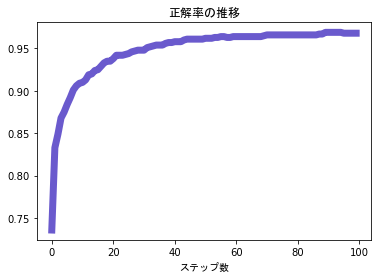

最終的な全体の正答率 94.753 パーセント
最序ステップの正答率 73.6 パーセント
最終ステップの正答率 96.8 パーセント


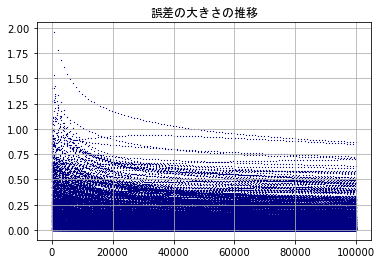

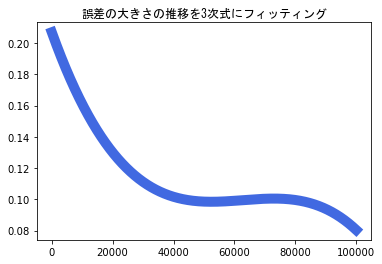

横軸が実際の数字、縦軸が誤った数字で各々の間違えた回数を表示する表


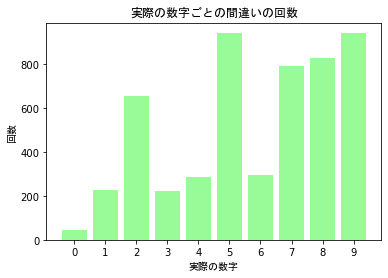

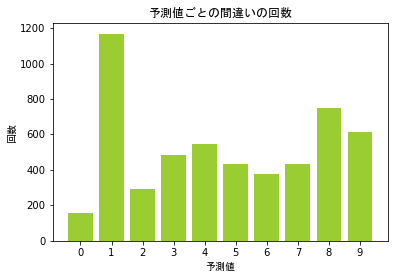

In [9]:
# 表示部



# ０～９のグラフ軸用の配列作成
ax=np.arange(0,done,1)

# 正誤の入った配列をステップごとにできるよう100,1000の形に整形
acu=acu.reshape([step,labels.size])

# 正解率の推移
a_av=np.mean(acu, axis = 1)
plt.plot(np.arange(0,step,1),a_av,color="slateblue",linewidth = 7.0)
plt.title('正解率の推移',fontname="MS Gothic")
plt.xlabel('ステップ数',fontname="MS Gothic")
plt.show()


# 誤差の大きさの推移
print("最終的な全体の正答率",(np.count_nonzero(acu == 1)/(done))*100,"パーセント")
print("最序ステップの正答率",(np.count_nonzero(acu[0] == 1))/(1000)*100,"パーセント")
print("最終ステップの正答率",(np.count_nonzero(acu[-1] == 1))/(1000)*100,"パーセント")
plt.scatter(ax,err_lis,s=0.3, c="navy", alpha=1,linewidths=0.7)
plt.title('誤差の大きさの推移',fontname="MS Gothic")
plt.grid(True)
plt.show()


# フィッティング
plt.plot(ax, np.poly1d(np.polyfit(ax, err_lis, 3))(ax),color="royalblue",linewidth = 10.0)
plt.title('誤差の大きさの推移を3次式にフィッティング',fontname="MS Gothic")
plt.show()


# 間違いの表
print("横軸が実際の数字、縦軸が誤った数字で各々の間違えた回数を表示する表")
color = np.full_like(err_num, "", dtype=object)
# 100以上の数値を色付けるための配列を作成
for i in range(len(err_num)):
    for j in range(len(err_num.T)):
        if err_num[i, j] >= 300:
            color[i, j] = 'firebrick'
        elif err_num[i, j] >= 150:
            color[i, j] = 'tomato'
        elif err_num[i, j] >= 75:
            color[i, j] = 'moccasin'
        elif err_num[i, j] >= 30:
            color[i, j] = 'wheat'
        elif err_num[i, j] >= 3:
            color[i, j] = 'white'
        else:
            color[i, j] = 'lightcyan'
plt.table(err_num,colLabels=np.arange(10),rowLabels=np.arange(10),cellColours=color)
plt.axis('off')
plt.show()


# 実際の数字ごとの間違いの回数
plt.bar(np.arange(10),np.sum(err_num,axis=1),color="palegreen")
plt.title('実際の数字ごとの間違いの回数',fontname="MS Gothic")
plt.xlabel('実際の数字',fontname="MS Gothic")
plt.ylabel('回数',fontname="MS Gothic")
plt.xticks(np.arange(0, 10, 1))
plt.show()


# 予測値ごとの間違いの回数
plt.bar(np.arange(10),np.sum(err_num,axis=0),color="yellowgreen")
plt.title('予測値ごとの間違いの回数',fontname="MS Gothic")
plt.xlabel('予測値',fontname="MS Gothic")
plt.ylabel('回数',fontname="MS Gothic")
plt.xticks(np.arange(0, 10, 1))
plt.show()





In [12]:
# キャンバスを使った試験
# キャンバス部


%matplotlib inline
from IPython.core.display import HTML
import base64
from io import BytesIO
HTML('''
<canvas id="canvas" height="300px" width="300px" style="border: 1px solid;"></canvas>
<p><input id="variable" type="text" placeholder="Input python variable name" value="tes" size="30"></p>
<p>
    <button id="clear">消す</button>
    <button id="submit">この数字を使う</button>
</p>
<p id="msg"></p>
<script>
    var kernel = IPython.notebook.kernel;

    var config = {
        "linesize": 7,
        "linecolor": "#000000"
    }

    var mouse = {
        "X": null,
        "Y": null,
    }

    var variable = document.getElementById("variable");
    var clear = document.getElementById("clear");
    var submit = document.getElementById("submit");
    var canvas = document.getElementById("canvas");
    var ctx = canvas.getContext("2d");

    clear.addEventListener("click", function(){
        ctx.clearRect(0, 0, canvas.width, canvas.height);
    });

    submit.addEventListener("click", function(){
        if (variable.value === ""){
            msg.textContent = "Fail: Pls input variable name";
        }else{
            kernel.execute(variable.value + " = '" + canvas.toDataURL() + "'");
            msg.textContent = "Success: " + "image -> " + variable.value;
        }
    });

    canvas.addEventListener("mouseup", drawEnd, false);
    canvas.addEventListener("mouseout", drawEnd, false);
    
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons === 1 || e.witch === 1) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        };
    });
 
    canvas.addEventListener("mousedown", function(e){
        if (e.button === 0) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        }
    });

    function draw(X, Y) {
        ctx.beginPath();
        if (mouse.X === null) {
            ctx.moveTo(X, Y);
        } else {
            ctx.moveTo(mouse.X, mouse.Y);
        }
        ctx.lineTo(X, Y);
        
        ctx.lineCap = "round";
        ctx.lineWidth = config.linesize * 2.5;
        ctx.strokeStyle = config.linecolor;
        ctx.stroke();

        mouse.X = X;
        mouse.Y = Y;
    };
 
    function drawEnd() {
        mouse.X = null;
        mouse.Y = null;
    }
</script>
''')


実際の数値は？:4
実際の数字: 4 予測した数字 4 誤差指数 0.2679709 当たったよ！やったね


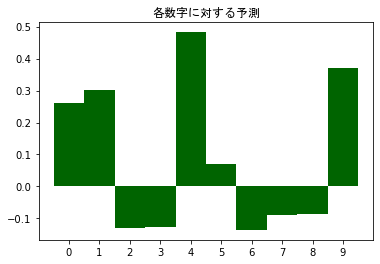

In [17]:
# 試験部



# 画像加工用にPILライブラリをインポート
from PIL import Image

tes = tes.split(",")[-1]

img = Image.open(BytesIO(base64.b64decode(tes)))

plt.imshow(np.asarray(img))
plt.title("取り込んだ画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 取り出した画像をリサイズ（指定ピクセルの大きさに変換）、白黒にコンバート
res_img=img.convert(mode="LA").resize((28,28))
plt.imshow(res_img)
plt.title("加工した画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 加工した画像を一次元配列化し、一番深い配列にガンマ値の要素が残っているので削除する
mol_img=np.delete(res_img, 0, -1).reshape(-2)
# print(mol_img.reshape(28,28))
# 実際の数字の入力
num=int(input("実際の数値は？:"))
# 予測値を導出
pred=np.dot(mol_img,wei)
# 実際の数字を上記labelsの形に落とし込む
num_lis=np.zeros(10)
num_lis[num]=1
# 純誤差(偏差)の導出
err=pred-num_lis
# エラーと入力値による直積でデルタを導出
DaM=np.outer(mol_img,err)
# 一番大きい(1に近い)値をpredから取り出す
nea=pred.argmax()
# 実際の値に対しての誤差の大きさを出し、格納
ers=round((1-pred[num])**2,7)
# 正誤判定
if nea==num:
    msg="当たったよ！やったね"
else:
    msg="残念…もっと字を綺麗に書こう"
# 出力  
print("実際の数字:",num,"予測した数字",nea,"誤差指数",ers,msg)
# グラフ化
plt.bar(np.arange(10),pred, width=1.0,color="darkgreen")
plt.xticks(np.arange(0, 10, 1))
plt.title("各数字に対する予測",fontname="MS Gothic")
wei-=(DaM*alp)

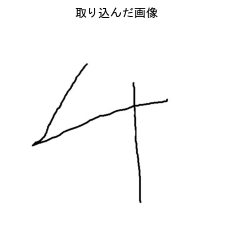

実際の数値は？:4
実際の数字: 4 予測した数字 4 誤差指数 0.5345879 当たったよ！やったね


In [18]:
# 画像取り込みによる試験





# 画像を取り出す
img_name='four.jpg'
# img_name='test.jpg'
img=Image.open(img_name) 
plt.imshow(img)
plt.title("取り込んだ画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 取り出した画像をリサイズ（指定ピクセルの大きさに変換）、白黒にコンバート
res_img=img.resize((28,28)).convert(mode="L")
plt.imshow(res_img)
plt.title("加工した画像",fontname="MS Gothic")
plt.axis("off")
plt.show()
# 加工した画像を一次元配列化し、先ほどのコンバートの仕様上白黒が逆転しているので元の色身に戻す
mol_img=255-np.array(res_img).reshape(-1)
# print(mol_img.reshape(28,28))
# 実際の数字の入力
num=int(input("実際の数値は？:"))
# 予測値を導出
pred=np.dot(mol_img,wei)
# 実際の数字を上記labelsの形に落とし込む
num_lis=np.zeros(10)
num_lis[num]=1
# 純誤差(偏差)の導出
err=pred-num_lis
# エラーと入力値による直積でデルタを導出
DaM=np.outer(mol_img,err)
# 一番大きい(1に近い)値をpredから取り出す
nea=pred.argmax()
# 実際の値に対しての誤差の大きさを出し、格納
ers=round((1-pred[num])**2,7)
# 正誤判定
if nea==num:
    msg="当たったよ！やったね"
else:
    msg="残念…もっと字を綺麗に書こう"
# 出力  
print("実際の数字:",num,"予測した数字",nea,"誤差指数",ers,msg)
# グラフ化
plt.bar(np.arange(10),pred, width=1.0,color="darkgreen")
plt.xticks(np.arange(0, 10, 1))
plt.title("各数字に対する予測",fontname="MS Gothic")
wei-=(DaM*alp*0.000001)

In [8]:
wei_mat=wei.reshape([10,28,28])
print(wei_mat[0])

[[ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
   1.000